## For the following code, we present results showing the effects of statistical properties on various tasks—Syntax Error, Missing Token, Performance Prediction Task, and Equivalence Task—across different datasets (SDSS, SQLShare, Join-Order). We generated all statistical properties for five large language models (LLMs): GPT-4, GPT-3.5, Llama3, Mistralai, and Gemini. However, not all figures could be included in the paper; we selected those that most clearly illustrate relationships, or lack thereof.

#### The code below is for Figure 6(a,b), where we demonstrate the impact of the statistical property 'word count' on the task of syntax error detection within the SDSS dataset. We produced results for five large language models (LLMs), but only the results from Llama and Gemini are used.

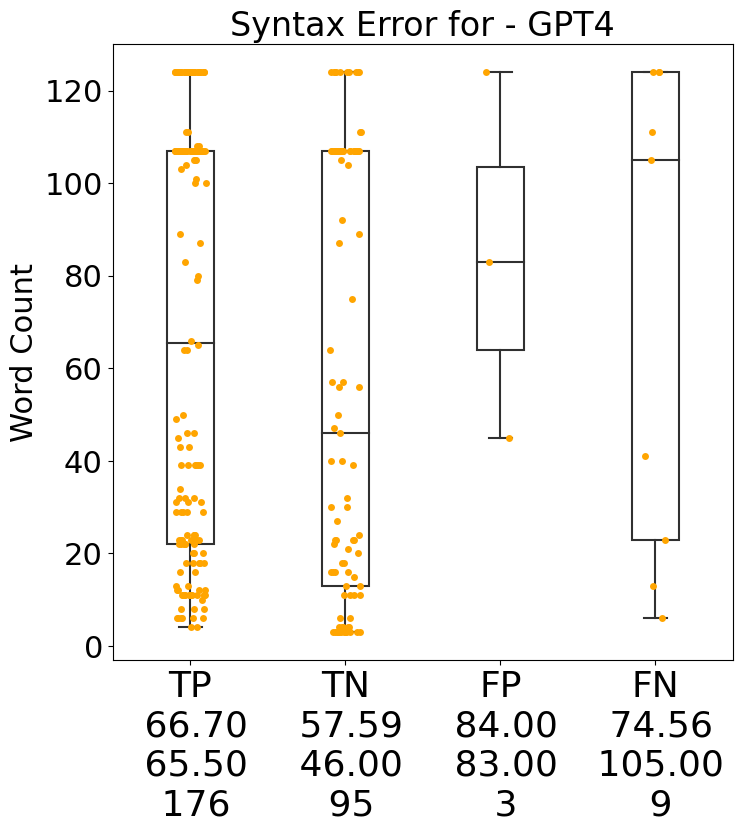

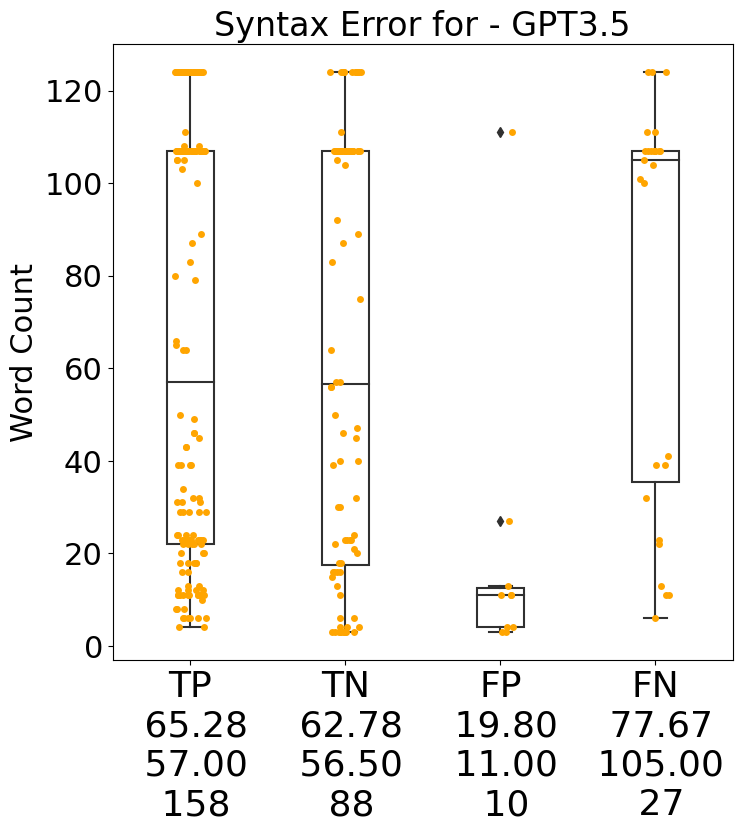

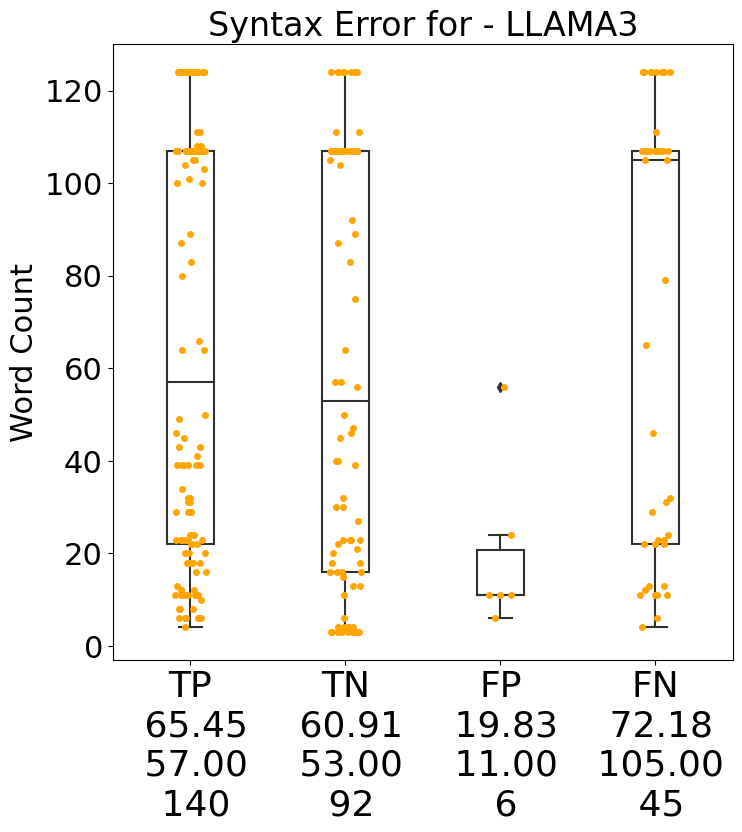

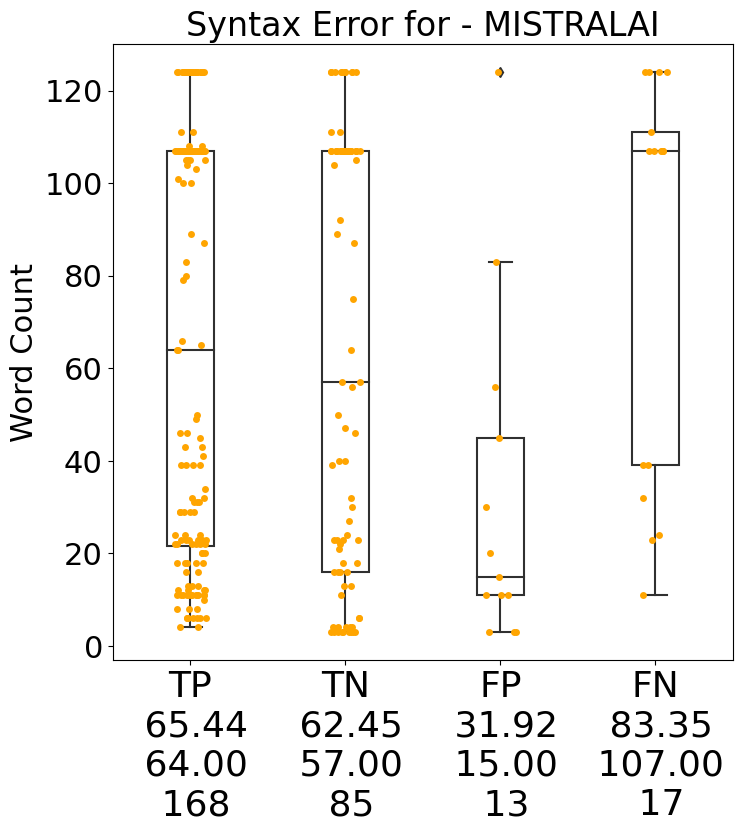

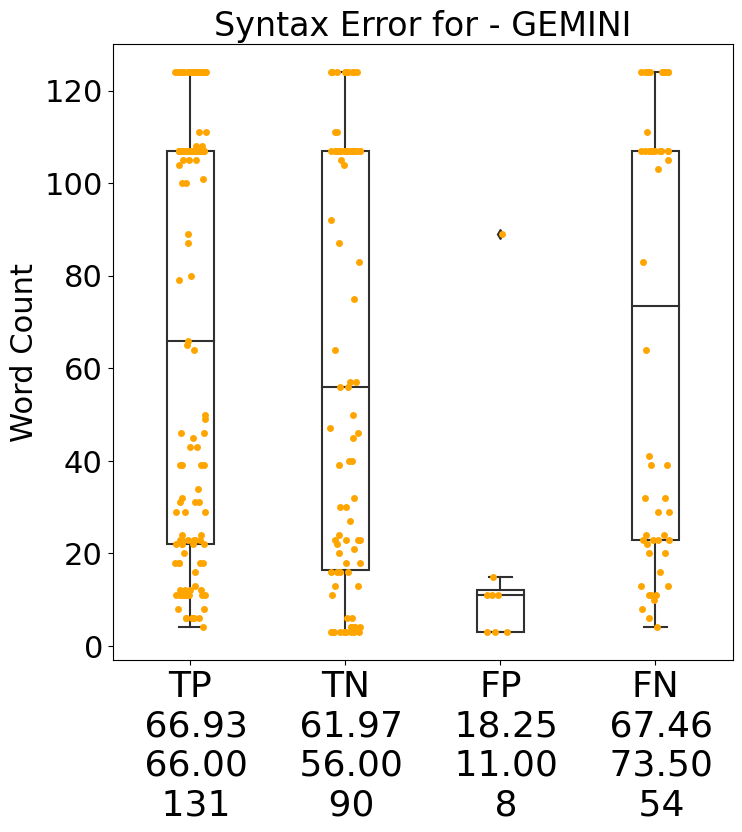

In [47]:
#word count syntax error with sdss 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Disable warnings
warnings.filterwarnings("ignore")

# Define the directory for saving plots
output_directory = r'C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Load data
stats = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Stats\sdss_stats.csv")
missing_word = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Results of LLM\Experiments  for Syntax Error\syntax_error_sdss.csv")

# Data merging
merged_df = pd.merge(stats, missing_word, on='SQL_Statement', how='inner')

# Convert 'YES'/'NO' to 1/0
merged_df['Original'] = merged_df['Original'].map({'YES': 1, 'NO': 0})
for llm in ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']:
    merged_df[llm] = merged_df[llm].map({'YES': 1, 'NO': 0}).fillna(1)

# Define the list of models
llms = ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']

# Plotting loop
for llm in llms:
    fig, ax = plt.subplots(figsize=(8, 8))

    y_true = merged_df['Original']
    y_pred = merged_df[llm]

    # Calculate TP, TN, FP, FN
    merged_df[f'{llm}_tp'] = (y_true == 1) & (y_pred == 1)
    merged_df[f'{llm}_tn'] = (y_true == 0) & (y_pred == 0)
    merged_df[f'{llm}_fp'] = (y_true == 0) & (y_pred == 1)
    merged_df[f'{llm}_fn'] = (y_true == 1) & (y_pred == 0)

    # Initialize data structure for categories
    plot_data = pd.DataFrame()
    categories = ['TP', 'TN', 'FP', 'FN']
    custom_labels = []

    # Loop through each category to collect data and labels
    for cat in categories:
        cat_name = f"{llm}_{cat.lower()}"
        true_indices = merged_df[cat_name]
        avg = merged_df.loc[true_indices, 'Word_Count'].mean() if true_indices.any() else 0
        med = merged_df.loc[true_indices, 'Word_Count'].median()
        count = true_indices.sum()
        label_part = cat.split('_')[-1].upper()
        label = f"{label_part}\n {avg:.2f}\n {med:.2f}\n {count}" if count > 0 else cat
        
        # Append data to plot_data
        merged_df.loc[true_indices, 'category'] = cat
        plot_data = pd.concat([plot_data, merged_df[true_indices]])

        # Append label
        custom_labels.append(label)

    # Ensure all categories are represented, even if empty
    plot_data['category'] = pd.Categorical(plot_data['category'], categories=categories, ordered=True)

    # Plot boxplot and stripplot
    sns.boxplot(x='category', y='Word_Count', data=plot_data, order=categories, palette=sns.color_palette("colorblind"), width=0.3, ax=ax, boxprops=dict(facecolor='none'))
    sns.stripplot(x='category', y='Word_Count', data=plot_data, order=categories, color='orange', size=5, jitter=True, ax=ax)

    # Set x-ticks and labels
    ax.set_xticks(range(len(custom_labels)))
    ax.set_xticklabels(custom_labels, rotation=0, ha='center',fontsize=26)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)  # Set y-axis labels font size
    ax.set_ylabel('Word Count', fontsize=22)
    ax.set_xlabel('')
    ax.set_title(f"Syntax Error for - {llm.upper()}", fontsize=24)

    # Show the plot with title


    
    
    # Save plots as PDF
    pdf_filename = os.path.join(output_directory, f"{llm}_word_count_plot_syn_error_sdss.pdf")
    plt.savefig(pdf_filename, bbox_inches='tight')
    plt.show()
    plt.close(fig)
    


#### The code below is for Figure 7(a), where we show the relationship between syntax error types and false negatives (FN) for the SDSS dataset.

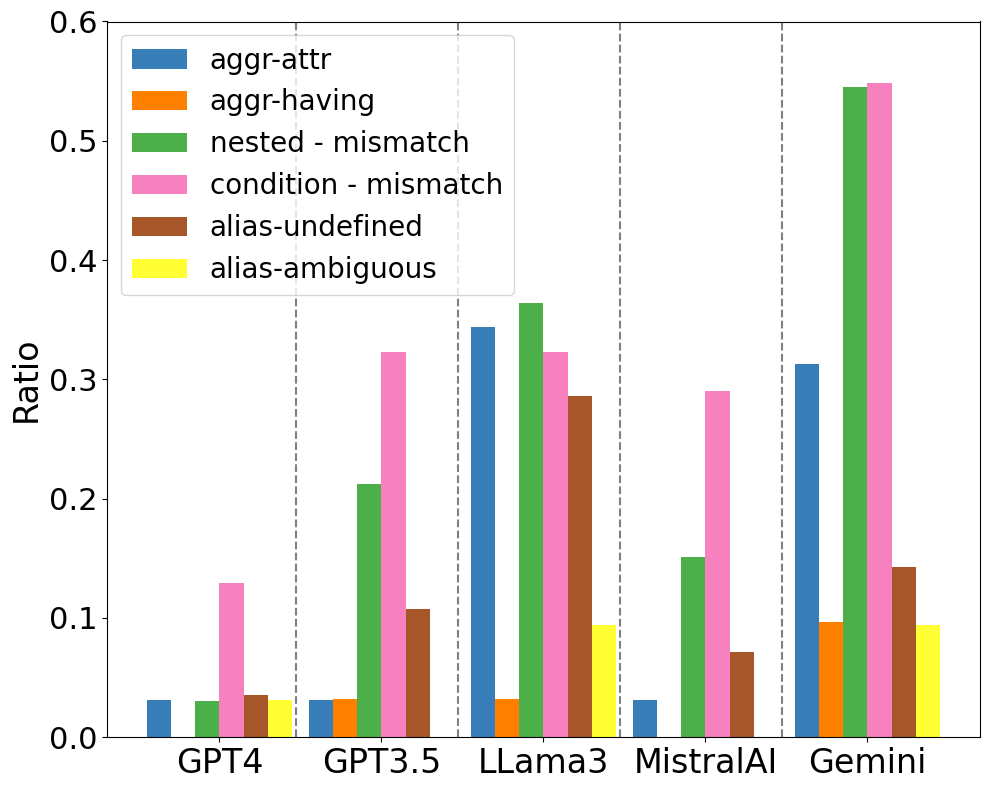

In [26]:
#for sdss Type
import matplotlib.pyplot as plt
import numpy as np
import os
output_directory = r'C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
# Set specific data for GPT-4 and random data for other models
# Data format: models x categories
data = np.array([
    [1/32, 0, 1/33, 4/31, 1/28, 1/32],  # GPT-4: Specific counts as provided
    [1/32, 1/31, 7/33, 10/31, 3/28, 0],  # GPT-3.5: Random data for demonstration
    [11/32,1/31,12/33,10/31,8/28,3/32],  # LLaMA-3: Random data for demonstration
    [1/32,0,5/33,9/31,2/28,0],  # Mistral AI: Random data for demonstration
    [10/32,3/31,18/33,17/31,4/28,3/32]   # Gemini: Random data for demonstration
])

categories = ['aggr-attr', 'aggr-having', 'nested - mismatch', 'condition - mismatch', 'alias-undefined', 'alias-ambiguous']
models = ['GPT4', 'GPT3.5', 'LLama3', 'MistralAI', 'Gemini']

# Colors that are colorblind friendly
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#ffff33']  # Unique color for each category

# Setting up the bar chart
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.15  # Width of the bars
index = np.arange(len(models))

# Create bars for each category
for i, category in enumerate(categories):
    ax.bar(index + i * bar_width, data[:, i], bar_width, label=category, color=colors[i])

for i in range(1, len(models)):
    ax.axvline(x=i - bar_width, color='gray', linestyle='--')

# Labeling and aesthetics
ax.set_xlabel('')
ax.set_ylabel('Ratio',fontsize=24)
ax.set_xticks(index + bar_width * (len(categories) - 1) / 2)
ax.set_xticklabels(models, fontsize=24)
ax.set_yticks(np.arange(0, 0.7, 0.1))

#ax.set_yticks(range(0, 0.5)) 
ax.tick_params(axis='y', labelsize=22)
#ax.legend()
ax.legend(loc='upper left', fontsize=20)
plt.tight_layout()

pdf_filename = os.path.join(output_directory, f"syntax_error_sdss.pdf")
plt.savefig(pdf_filename, bbox_inches='tight')
plt.show()
plt.close()
# Display the bar chart



#### The code below is for Figure 7(b), where we show the relationship between syntax error types and false negatives (FN) for the SDSS dataset.

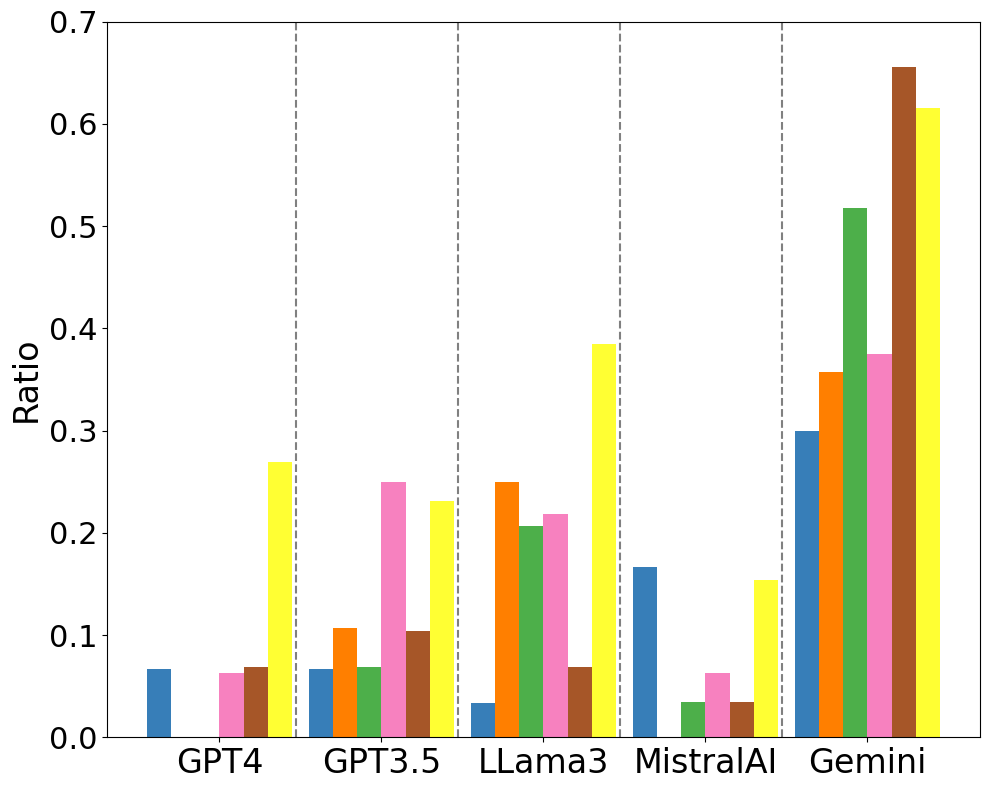

In [27]:
#for sqlshare Type
import matplotlib.pyplot as plt
import numpy as np
output_directory = r'C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
# Set specific data for GPT-4 and random data for other models
# Data format: models x categories
data = np.array([
    [2/30, 0, 0, 2/32, 2/29, 7/26],  # GPT-4: Specific counts as provided
    [2/30,3/28,2/29,8/32,3/29,6/26],  # GPT-3.5: Random data for demonstration
    [1/30,7/28,6/29,7/32,2/29,10/26],  # LLaMA-3: Random data for demonstration
    [5/30,0,1/29,2/32,1/29,4/26],  # Mistral AI: Random data for demonstration
    [9/30,10/28,15/29,12/32,19/29,16/26]   # Gemini: Random data for demonstration
])

categories = ['aggr-attr', 'aggr-having', 'nested - mismatch', 'condition - mismatch', 'alias-undefined', 'alias-ambiguous']
models = ['GPT4', 'GPT3.5', 'LLama3', 'MistralAI', 'Gemini']

# Colors that are colorblind friendly
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#ffff33']  # Unique color for each category

# Setting up the bar chart
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.15  # Width of the bars
index = np.arange(len(models))

# Create bars for each category
for i, category in enumerate(categories):
    ax.bar(index + i * bar_width, data[:, i], bar_width, label=category, color=colors[i])
    
for i in range(1, len(models)):
    ax.axvline(x=i - bar_width, color='gray', linestyle='--')

# Labeling and aesthetics
ax.set_xlabel('')
ax.set_ylabel('Ratio',fontsize=24)
ax.set_xticks(index + bar_width * (len(categories) - 1) / 2)
ax.set_xticklabels(models, fontsize=24)
ax.set_yticks(np.arange(0, 0.8, 0.1))

#ax.set_yticks(range(0, 0.5)) 
ax.tick_params(axis='y', labelsize=22)
#ax.legend()
plt.tight_layout()

pdf_filename = os.path.join(output_directory, f"syntax_error_sqlshare.pdf")
plt.savefig(pdf_filename, bbox_inches='tight')
plt.show()
plt.close()
#fig.savefig('missing_token_type_join.pdf', format='pdf')
# Display the bar chart
#plt.show()



#### The code below is for Figure 7(c), where we show the relationship between syntax error types and false negatives (FN) for the SDSS dataset.

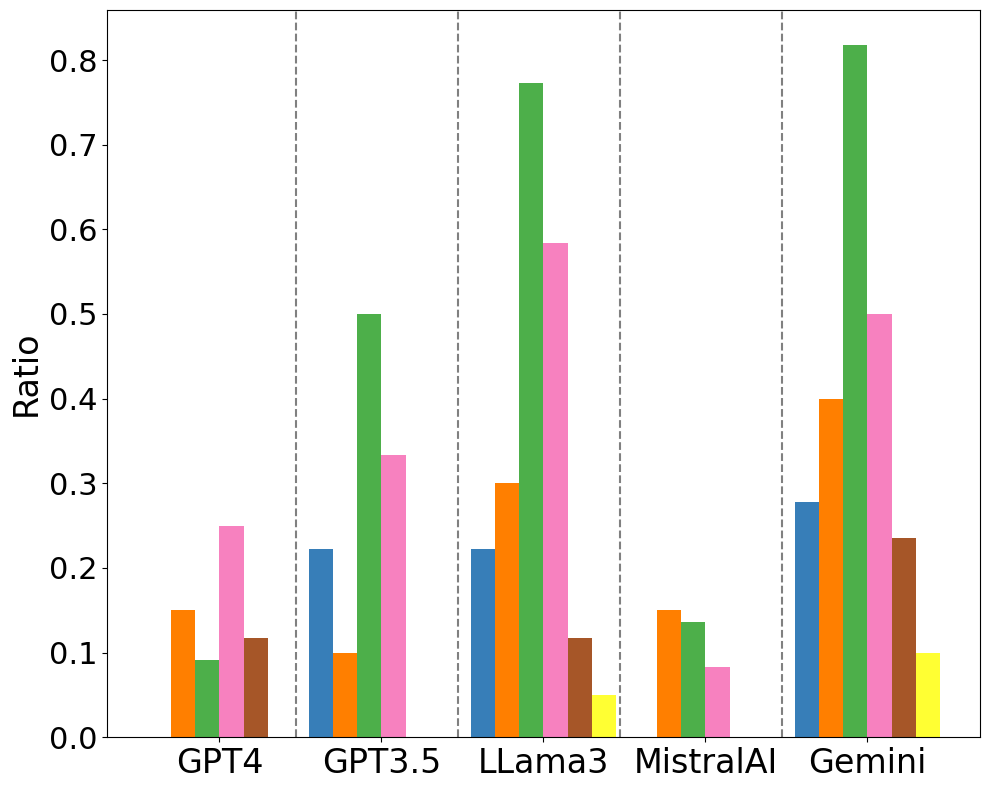

In [28]:
#for join Type
import matplotlib.pyplot as plt
import numpy as np
output_directory = r'C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
# Set specific data for GPT-4 and random data for other models
# Data format: models x categories
data = np.array([
    [0, 3/20, 2/22, 3/12, 2/17, 0],  # GPT-4: Specific counts as provided
    [4/18, 2/20, 11/22, 4/12, 0, 0],  # GPT-3.5: Random data for demonstration
    [4/18,6/20,17/22,7/12,2/17,1/20],  # LLaMA-3: Random data for demonstration
    [0,3/20,3/22,1/12,0,0],  # Mistral AI: Random data for demonstration
    [5/18,8/20,18/22,6/12,4/17,2/20]   # Gemini: Random data for demonstration
])

categories = ['aggr-attr', 'aggr-having', 'nested - mismatch', 'condition - mismatch', 'alias-undefined', 'alias-ambiguous']
models = ['GPT4', 'GPT3.5', 'LLama3', 'MistralAI', 'Gemini']

# Colors that are colorblind friendly
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#ffff33']  # Unique color for each category

# Setting up the bar chart
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.15  # Width of the bars
index = np.arange(len(models))

# Create bars for each category
for i, category in enumerate(categories):
    ax.bar(index + i * bar_width, data[:, i], bar_width, label=category, color=colors[i])
    
for i in range(1, len(models)):
    ax.axvline(x=i - bar_width, color='gray', linestyle='--')

# Labeling and aesthetics
ax.set_xlabel('')
ax.set_ylabel('Ratio',fontsize=24)
ax.set_xticks(index + bar_width * (len(categories) - 1) / 2)
ax.set_xticklabels(models, fontsize=24)
ax.set_yticks(np.arange(0, 0.9, 0.1))

#ax.set_yticks(range(0, 0.5)) 
ax.tick_params(axis='y', labelsize=22)
#ax.legend()
plt.tight_layout()

pdf_filename = os.path.join(output_directory, f"syntax_error_join.pdf")
plt.savefig(pdf_filename, bbox_inches='tight')
plt.show()
plt.close()
#fig.savefig('missing_token_type_join.pdf', format='pdf')
# Display the bar chart
#plt.show()



#### This is for Figure 8(a), where we demonstrate the impact of the statistical property 'word count' on the task of detecting missing tokens within the SQLShare dataset. We produced results for five large language models (LLMs), but only the results from GPT-3.5 are used in the paper.

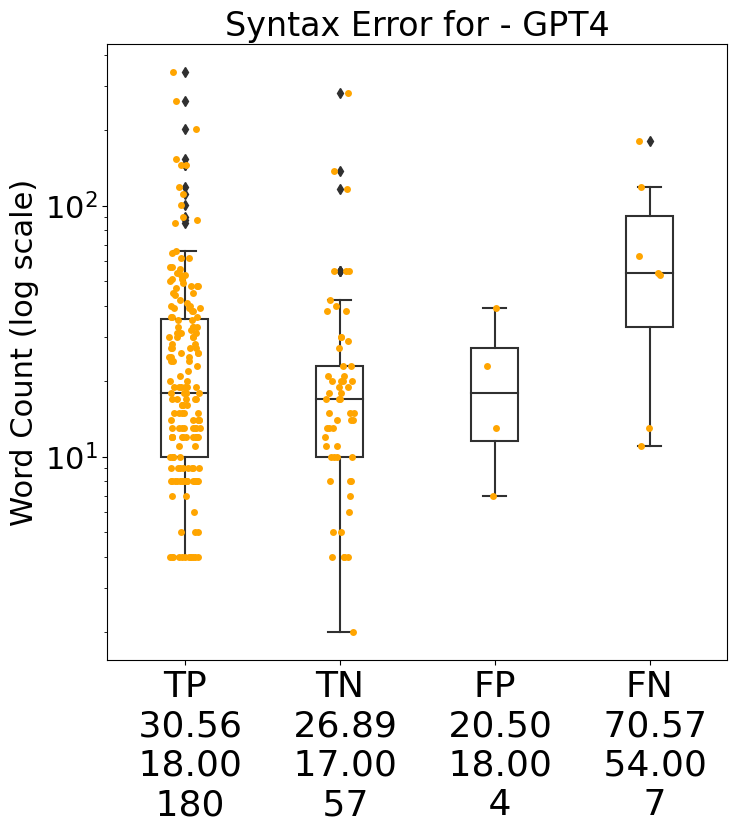

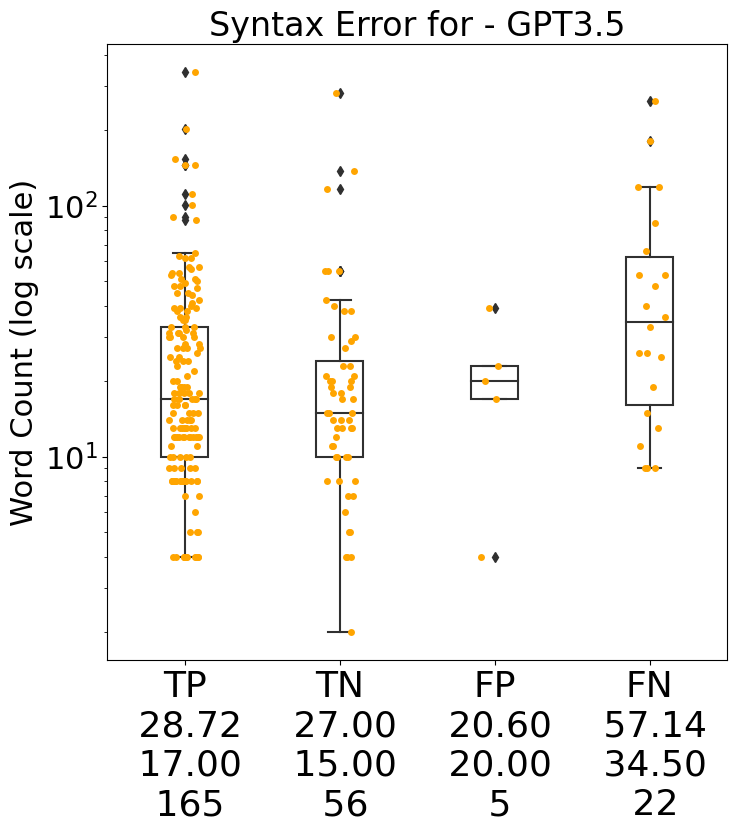

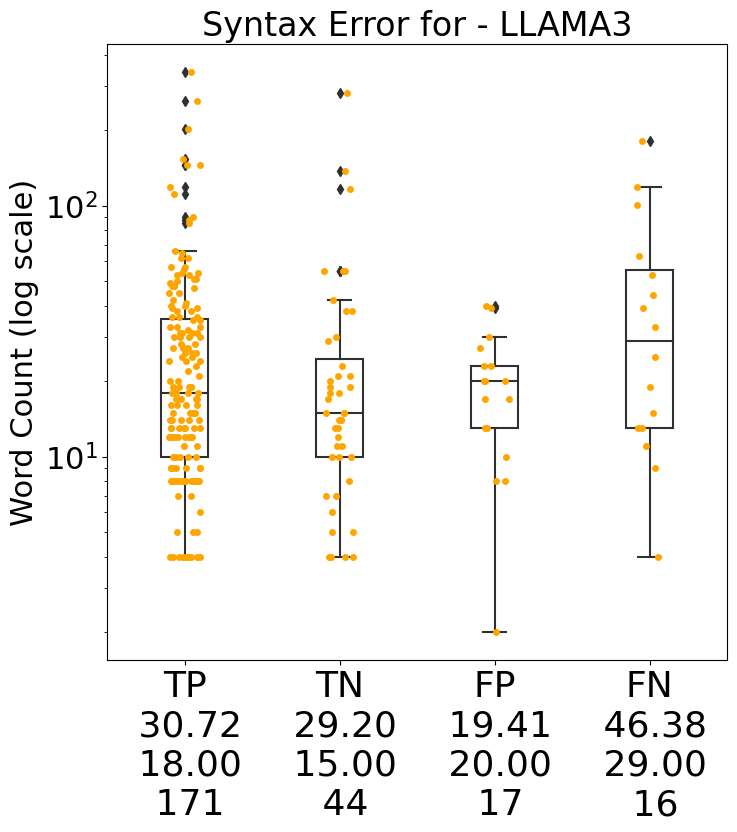

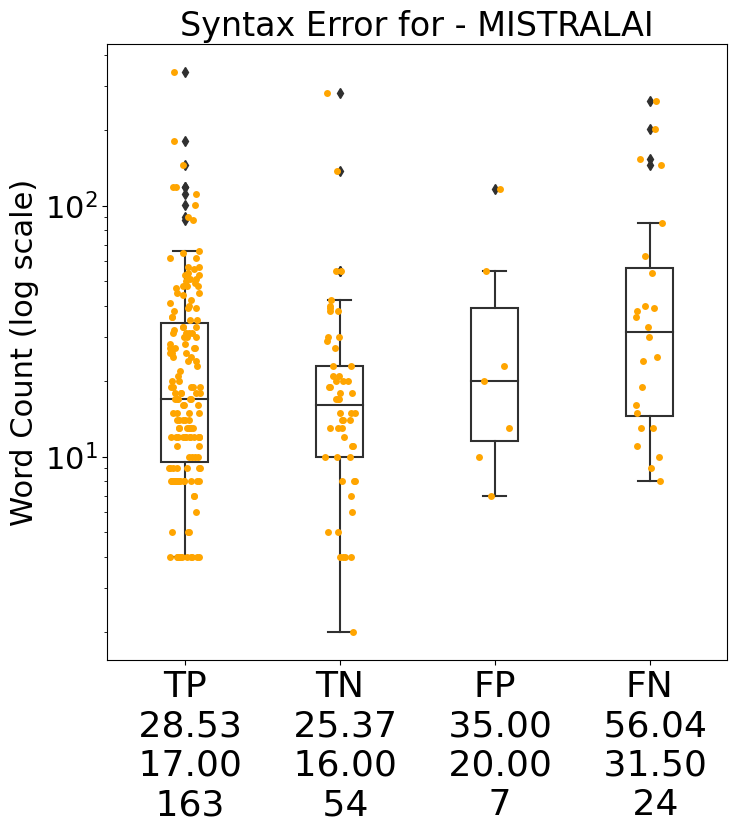

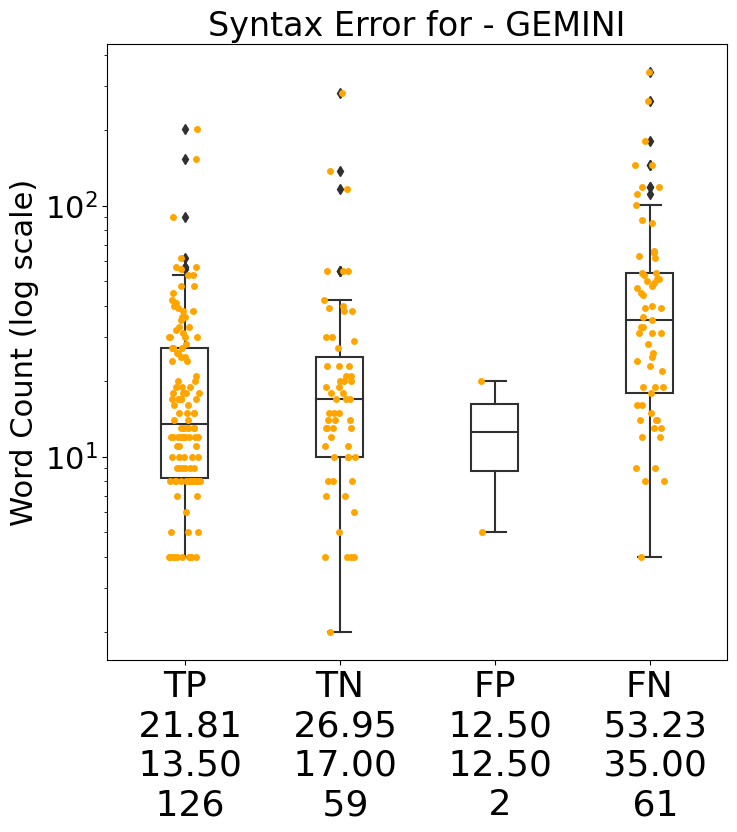

In [29]:
#missing token with sqlshare for word count as it has no value for FN in gpt4 and mistralai
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Disable warnings
warnings.filterwarnings("ignore")

# Define the directory for saving plots
output_directory = r'C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Load data
stats = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Stats\sqlshare_stats.csv")
missing_word = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Results of LLM\Experiments for Missing Token\missing_token_sqlshare.csv")

# Data merging
merged_df = pd.merge(stats, missing_word, on='SQL_Statement', how='inner')

# Convert 'YES'/'NO' to 1/0
merged_df['Syntax_Error_sqlshare'] = merged_df['Syntax_Error_sqlshare'].map({'YES': 1, 'NO': 0})
for llm in ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']:
    merged_df[f'Syntax_Error_{llm}'] = merged_df[f'Syntax_Error_{llm}'].map({'YES': 1, 'NO': 0}).fillna(1)

# Define the list of models
llms = ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']

# Plotting loop
for llm in llms:
    fig, ax = plt.subplots(figsize=(8, 8))

    y_true = merged_df['Syntax_Error_sqlshare']
    y_pred = merged_df[f'Syntax_Error_{llm}']

    # Calculate TP, TN, FP, FN
    merged_df[f'{llm}_tp'] = (y_true == 1) & (y_pred == 1)
    merged_df[f'{llm}_tn'] = (y_true == 0) & (y_pred == 0)
    merged_df[f'{llm}_fp'] = (y_true == 0) & (y_pred == 1)
    merged_df[f'{llm}_fn'] = (y_true == 1) & (y_pred == 0)

    # Initialize data structure for categories
    plot_data = pd.DataFrame()
    categories = ['TP', 'TN', 'FP', 'FN']
    custom_labels = []

    # Loop through each category to collect data and labels
    for cat in categories:
        cat_name = f"{llm}_{cat.lower()}"
        true_indices = merged_df[cat_name]
        avg = merged_df.loc[true_indices, 'Word_Count'].mean() if true_indices.any() else 0
        med = merged_df.loc[true_indices, 'Word_Count'].median()
        count = true_indices.sum()
        label_part = cat.split('_')[-1].upper()
        label = f"{label_part}\n {avg:.2f}\n {med:.2f}\n {count}"
        # Append data to plot_data
        merged_df.loc[true_indices, 'category'] = cat
        plot_data = pd.concat([plot_data, merged_df[true_indices]])

        # Append label
        custom_labels.append(label)

    # Ensure all categories are represented, even if empty
    plot_data['category'] = pd.Categorical(plot_data['category'], categories=categories, ordered=True)

    # Plot boxplot and stripplot
    sns.boxplot(x='category', y='Word_Count', data=plot_data, order=categories, palette=sns.color_palette("colorblind"), width=0.3, ax=ax, boxprops=dict(facecolor='none'))
    sns.stripplot(x='category', y='Word_Count', data=plot_data, order=categories, color='orange', size=5, jitter=True, ax=ax)

    # Set x-ticks and labels
    ax.set_xticks(range(len(custom_labels)))
    ax.set_xticklabels(custom_labels, rotation=0, ha='center',fontsize=26)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)  # Set y-axis labels font size
    #ax.set_ylabel('Word Count', fontsize=22)
    ax.set_yscale('log')  # Set the y-axis to a logarithmic scale
    ax.set_ylabel('Word Count (log scale)', fontsize=22)
    ax.set_xlabel('')
    ax.set_title(f"Syntax Error for - {llm.upper()}", fontsize=24)

    # Show the plot with title
   

    # Save plots as PDF
    pdf_filename = os.path.join(output_directory, f"{llm}_word_count_plot_missing_token_sqlshare.pdf")
    plt.savefig(pdf_filename, bbox_inches='tight')
    plt.show()
    plt.close(fig)


#### This is for Figure 8(b), where we demonstrate the impact of the statistical property 'Predicate Count' on the task of detecting missing tokens within the SQLShare dataset. We produced results for five large language models (LLMs), but only the results from Gemini are used in the paper.

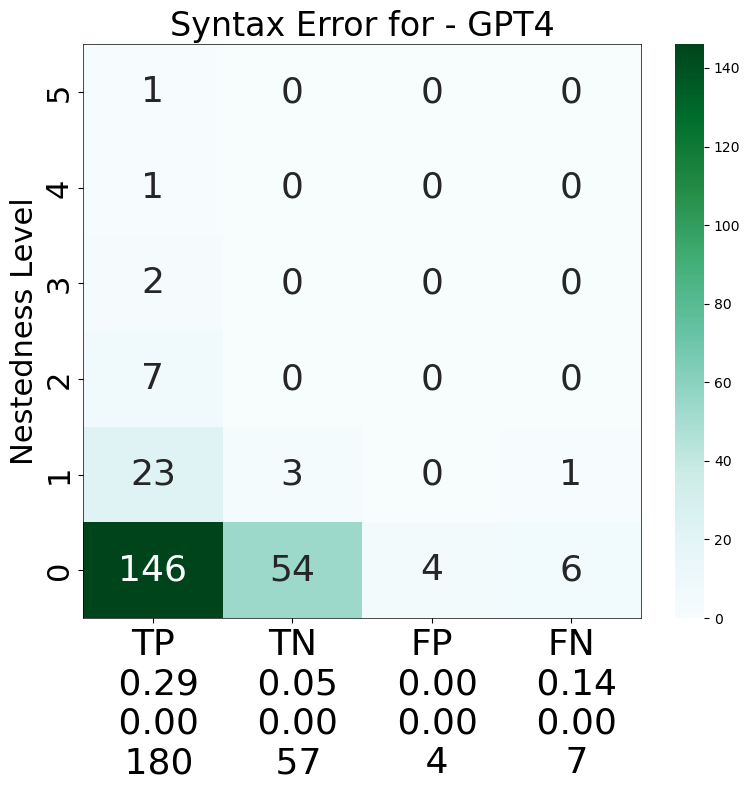

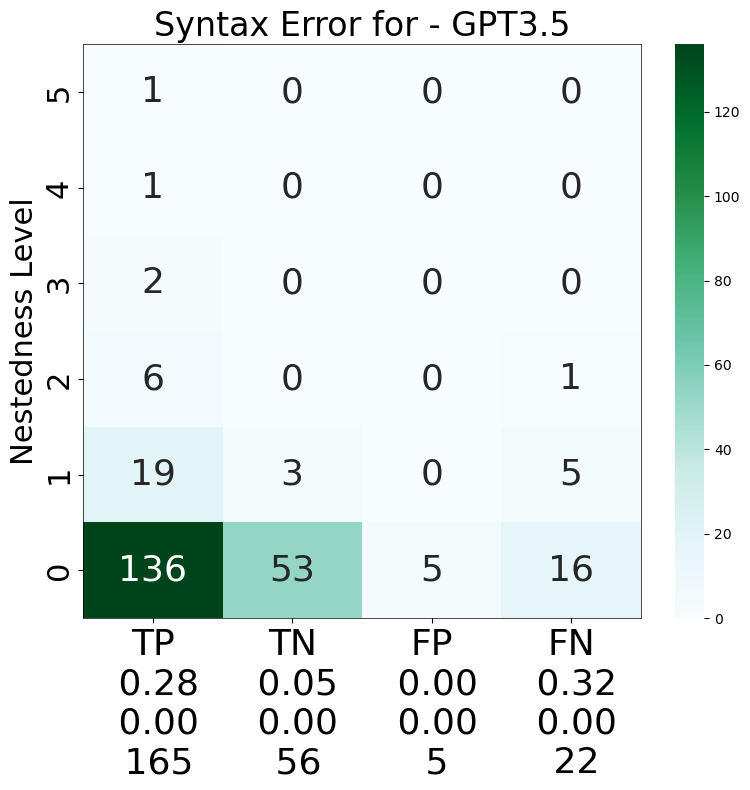

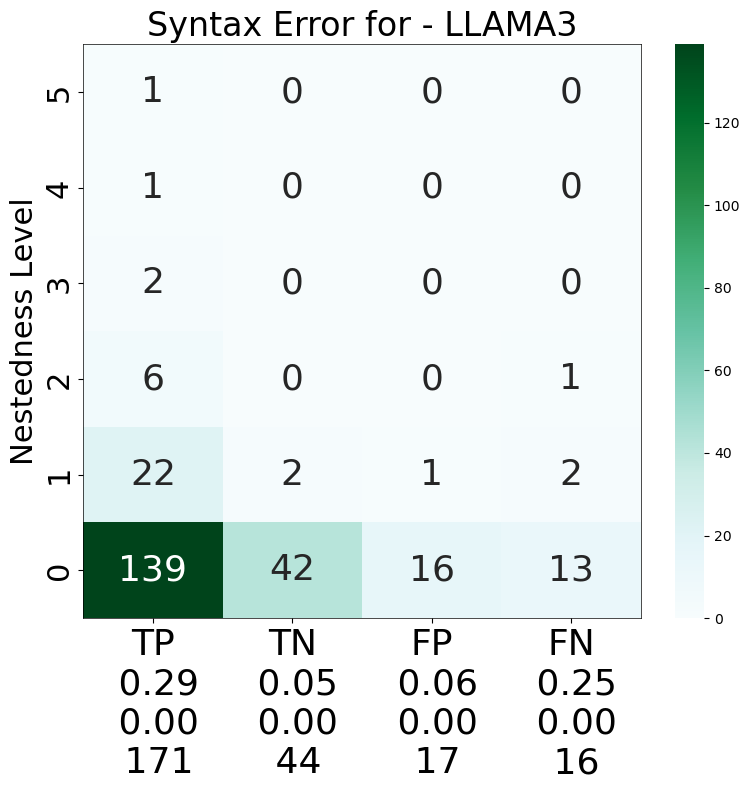

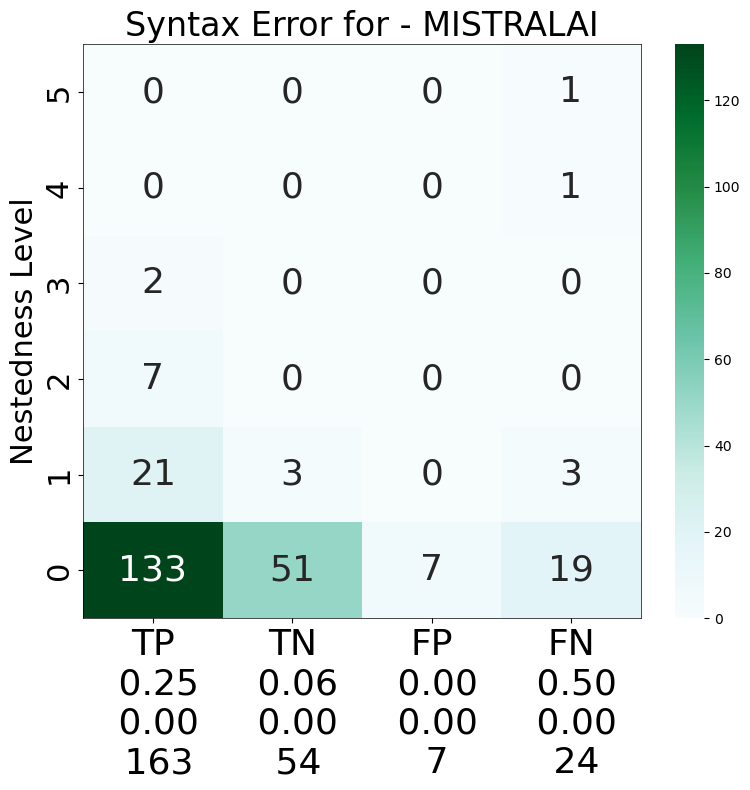

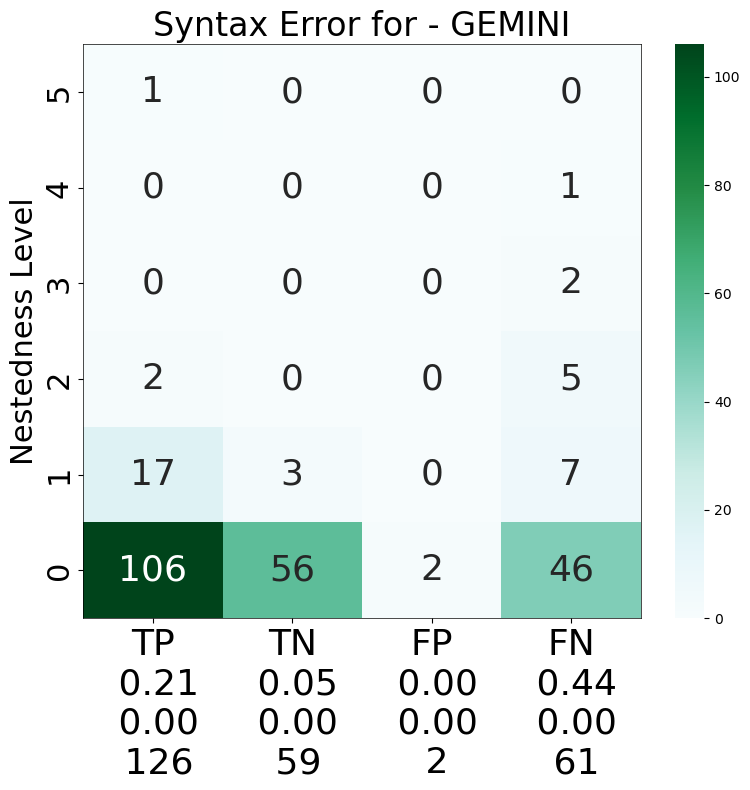

In [30]:
#Heatmap for Nestedness level for Missing Token for Sqlshare
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Disable warnings
warnings.filterwarnings("ignore")

# Define the directory for saving plots
output_directory = r'C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Load data
stats = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Stats\sqlshare_stats.csv")
missing_word = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Results of LLM\Experiments for Missing Token\missing_token_sqlshare.csv")

# Data merging
merged_df = pd.merge(stats, missing_word, on='SQL_Statement', how='inner')

# Convert 'YES'/'NO' to 1/0
merged_df['Syntax_Error_sqlshare'] = merged_df['Syntax_Error_sqlshare'].map({'YES': 1, 'NO': 0})
for llm in ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']:
    merged_df[f'Syntax_Error_{llm}'] = merged_df[f'Syntax_Error_{llm}'].map({'YES': 1, 'NO': 0}).fillna(1)

# Define the list of models
llms = ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']

# Calculate TP, TN, FP, FN for each model
for llm in llms:
    fig, ax = plt.subplots(figsize=(8, 8))
    y_true = merged_df['Syntax_Error_sqlshare']
    y_pred = merged_df[f'Syntax_Error_{llm}']
    
    # Explicit calculation of TP, TN, FP, FN
    categories = ['TP', 'TN', 'FP', 'FN']
    merged_df[f'{llm}_tp'] = (y_true == 1) & (y_pred == 1)
    merged_df[f'{llm}_tn'] = (y_true == 0) & (y_pred == 0)
    merged_df[f'{llm}_fp'] = (y_true == 0) & (y_pred == 1)
    merged_df[f'{llm}_fn'] = (y_true == 1) & (y_pred == 0)

    plot_data = pd.DataFrame()  # Initialize DataFrame to store plot data
    custom_labels = []  # Initialize list for custom labels

    for cat in categories:
        cat_name = f"{llm}_{cat.lower()}"
        true_indices = merged_df[cat_name]
        avg = merged_df.loc[true_indices, 'Nestedness_Level'].mean() if true_indices.any() else 0
        count = true_indices.sum()
        med = merged_df.loc[true_indices, 'Nestedness_Level'].median()
        #label = f"{cat}\nAvg: {avg:.2f}\nMed: {med:.2f}\nTotal: {count}" if count > 0 else cat
        label = f"{cat}\n {avg:.2f}\n {med:.2f}\n {count}" if count > 0 else cat
        
        # Append data to plot_data
        merged_df.loc[true_indices, 'category'] = cat
        plot_data = pd.concat([plot_data, merged_df[true_indices]])
        
        # Append label
        custom_labels.append(label)

    # Plotting heatmap
    unique_levels = pd.unique(merged_df['Nestedness_Level']).astype(int)
    heatmap_data = pd.DataFrame(index=sorted(unique_levels, reverse=True), columns=categories)
    for category in categories:
        category_data = plot_data.loc[plot_data['category'] == category, 'Nestedness_Level']
        count_data = category_data.value_counts().sort_index()
        heatmap_data[category] = count_data.reindex(heatmap_data.index).fillna(0)

    heatmap = sns.heatmap(heatmap_data, annot=True, cmap='BuGn', fmt=".0f", annot_kws={"size": 26})
    ax.set_xticklabels(custom_labels, fontsize=26)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)
    ax.set_ylabel('Nestedness Level', fontsize=22)
    ax.set_xlabel('')
    ax.set_title(f"Syntax Error for - {llm.upper()}", fontsize=24)
    for _, spine in heatmap.spines.items():
        spine.set_visible(True)
        spine.set_edgecolor('black')
        spine.set_linewidth(0.5)
    

    # Show the plot with title
    
    plt.tight_layout()
    pdf_filename = os.path.join(output_directory, f"{llm}_Nestedness_level_plot_missing_token_sqlshare.pdf")
    plt.savefig(pdf_filename, bbox_inches='tight')
    plt.show()
    plt.close()


#### This is for figure 8(c), where we show the task Missing Token for the statistical property Nestedness Level in the SQLShare dataset. We produced results for 5 LLMs, but we used only Gemini for the paper.

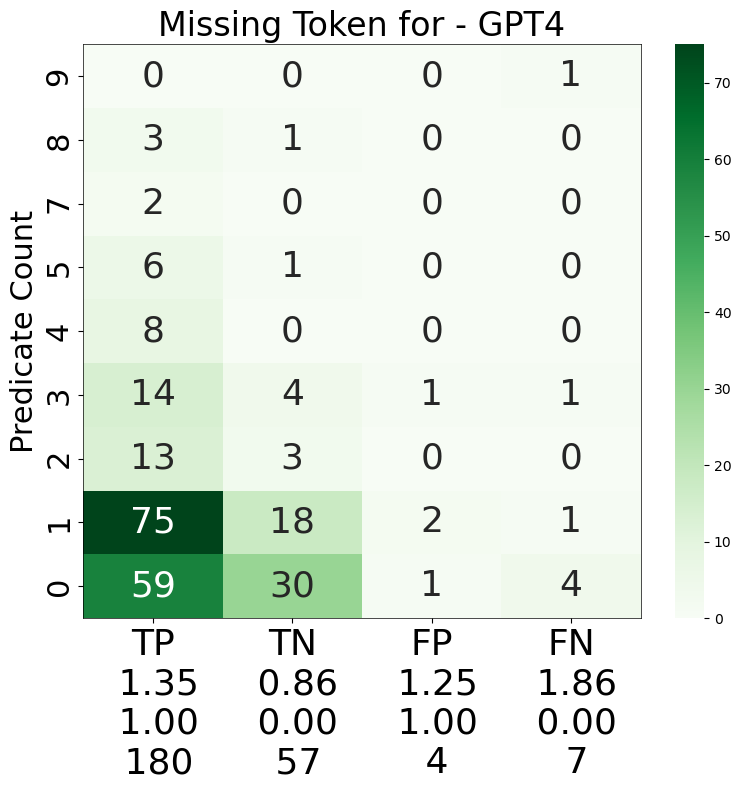

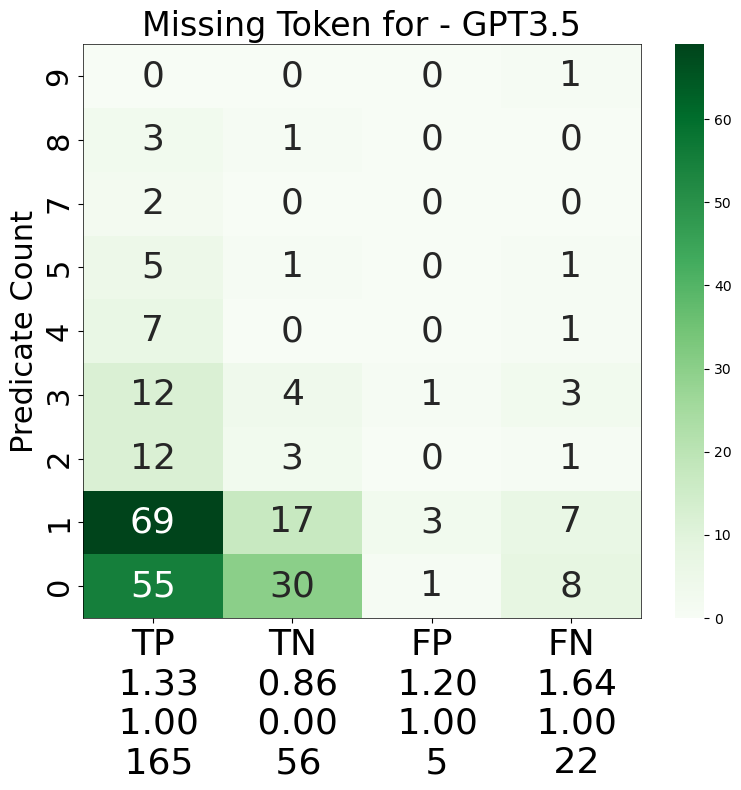

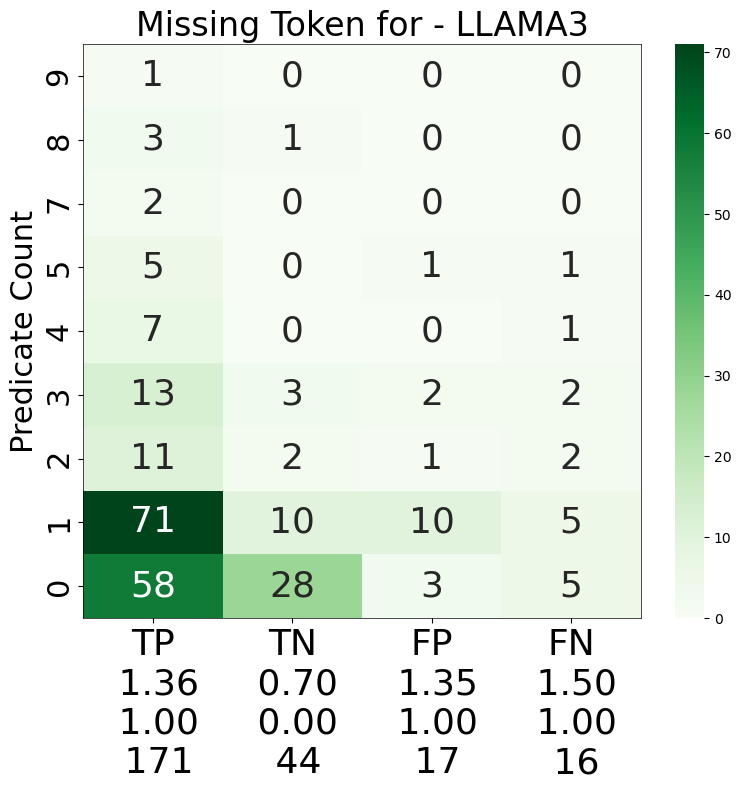

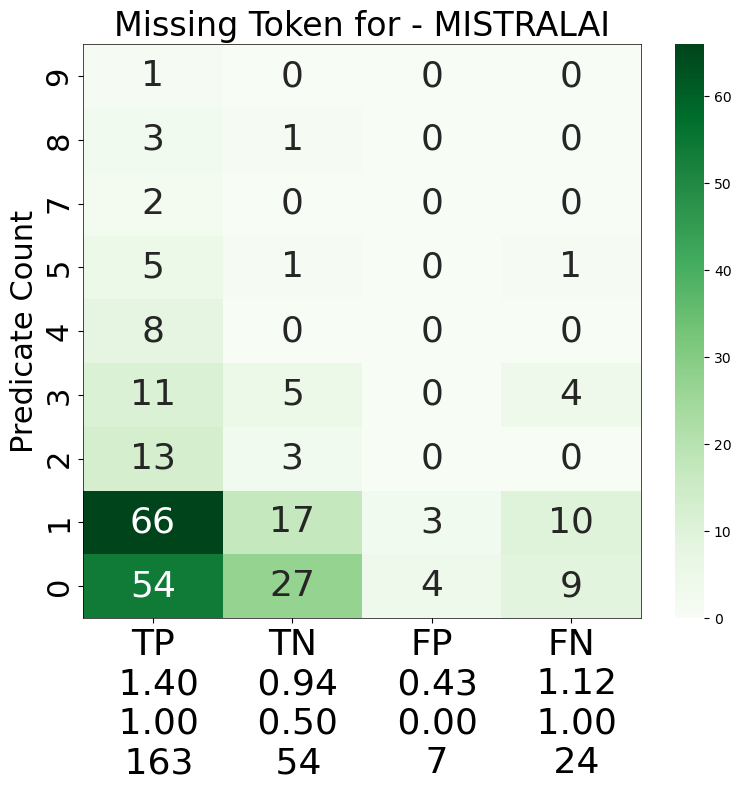

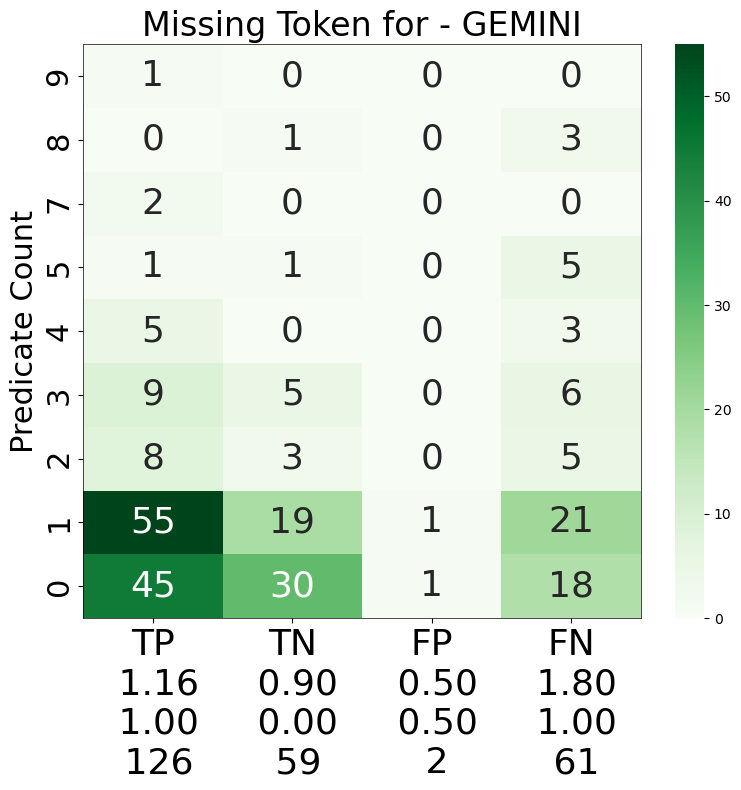

In [31]:
#Heatmap for Predicate for Missing Token for sqlshare
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Disable warnings
warnings.filterwarnings("ignore")

# Define the directory for saving plots
output_directory = r'C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Load data
stats = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Stats\sqlshare_stats.csv")
missing_word = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Results of LLM\Experiments for Missing Token\missing_token_sqlshare.csv")

# Data merging
merged_df = pd.merge(stats, missing_word, on='SQL_Statement', how='inner')

# Convert 'YES'/'NO' to 1/0
merged_df['Syntax_Error_sqlshare'] = merged_df['Syntax_Error_sqlshare'].map({'YES': 1, 'NO': 0})
for llm in ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']:
    merged_df[f'Syntax_Error_{llm}'] = merged_df[f'Syntax_Error_{llm}'].map({'YES': 1, 'NO': 0}).fillna(1)

# Define the list of models
llms = ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']

# Calculate TP, TN, FP, FN
for llm in llms:
    fig, ax = plt.subplots(figsize=(8, 8))
    y_true = merged_df['Syntax_Error_sqlshare']
    y_pred = merged_df[f'Syntax_Error_{llm}']

    categories = ['TP', 'TN', 'FP', 'FN']
    merged_df[f'{llm}_tp'] = (y_true == 1) & (y_pred == 1)
    merged_df[f'{llm}_tn'] = (y_true == 0) & (y_pred == 0)
    merged_df[f'{llm}_fp'] = (y_true == 0) & (y_pred == 1)
    merged_df[f'{llm}_fn'] = (y_true == 1) & (y_pred == 0)

    plot_data = pd.DataFrame()  # Initialize DataFrame to store plot data
    custom_labels = []  # Initialize list for custom labels

    for cat in categories:
        cat_name = f"{llm}_{cat.lower()}"
        true_indices = merged_df[cat_name]
        avg = merged_df.loc[true_indices, 'Predicate_Count'].mean() if true_indices.any() else 0
        count = true_indices.sum()
        med = merged_df.loc[true_indices, 'Predicate_Count'].median()
        #label = f"{cat}\nAvg: {avg:.2f}\nMed: {med:.2f}\nTotal: {count}" if count > 0 else cat
        label = f"{cat}\n {avg:.2f}\n {med:.2f}\n {count}" if count > 0 else cat
        
        # Append data to plot_data
        merged_df.loc[true_indices, 'category'] = cat
        plot_data = pd.concat([plot_data, merged_df[true_indices]])
        
        # Append label
        custom_labels.append(label)

    # Plotting heatmap
    unique_levels = pd.unique(merged_df['Predicate_Count']).astype(int)
    heatmap_data = pd.DataFrame(index=sorted(unique_levels, reverse=True), columns=categories)
    for category in categories:
        category_data = plot_data.loc[plot_data['category'] == category, 'Predicate_Count']
        count_data = category_data.value_counts().sort_index()
        heatmap_data[category] = count_data.reindex(heatmap_data.index).fillna(0)

    heatmap = sns.heatmap(heatmap_data, annot=True, cmap='Greens', fmt=".0f", annot_kws={"size": 26})
    ax.set_xticklabels(custom_labels, fontsize=26)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)
    ax.set_ylabel('Predicate Count', fontsize=22)
    ax.set_xlabel('')
    ax.set_title(f"Missing Token for - {llm.upper()}", fontsize=24)
    for _, spine in heatmap.spines.items():
        spine.set_visible(True)
        spine.set_edgecolor('black')
        spine.set_linewidth(0.5)
    

    plt.tight_layout()
    pdf_filename = os.path.join(output_directory, f"{llm}_Predicate_count_plot_missing_token_sqlshare.pdf")
    plt.savefig(pdf_filename, bbox_inches='tight')
    plt.show()
    plt.close()


#### This is for figure 8(d), where we present the task Missing Token for the statistical property Table Count in the SQLShare dataset. We produced results for 5 LLMs, but we only used Mistralai for the paper.

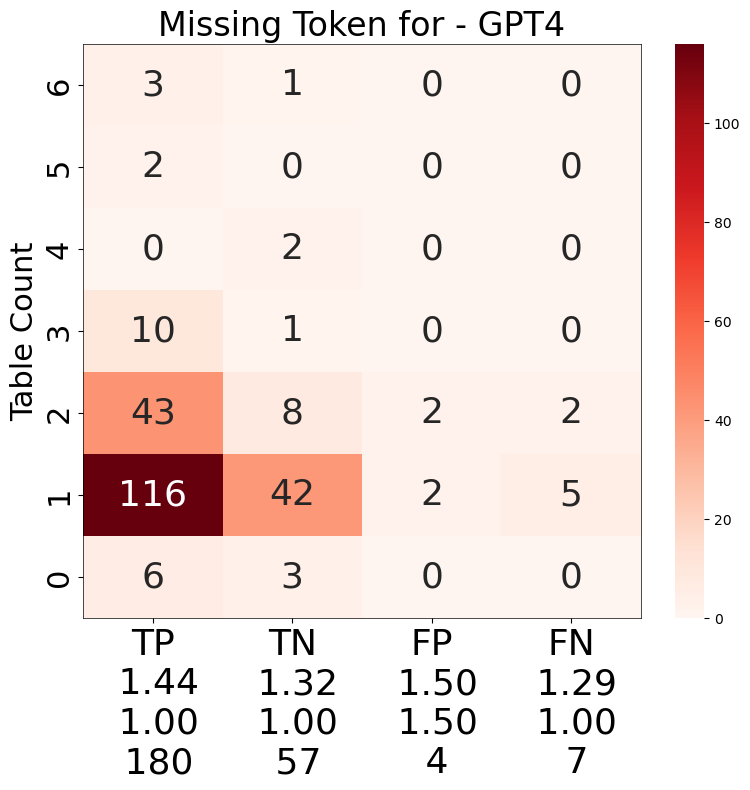

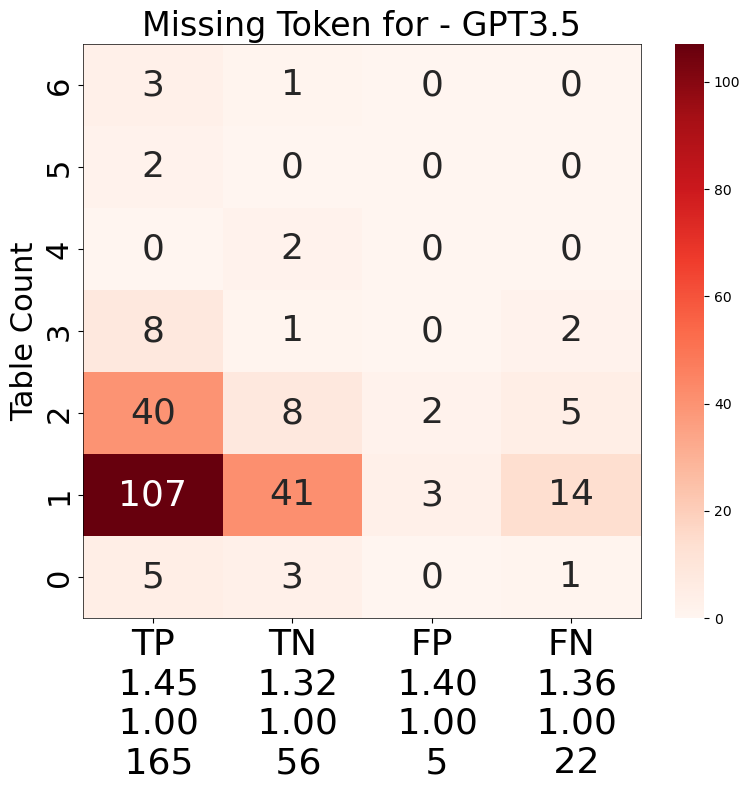

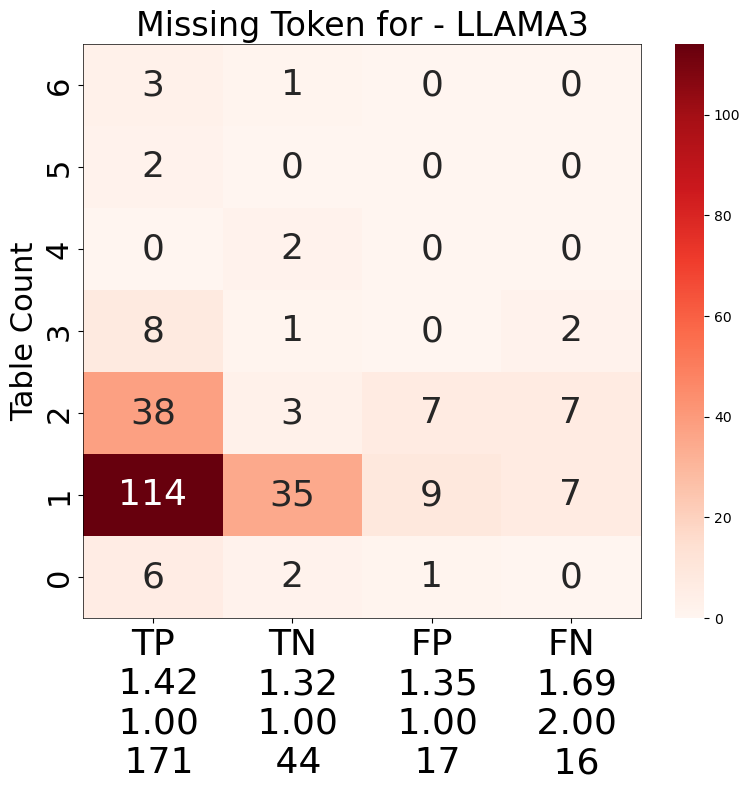

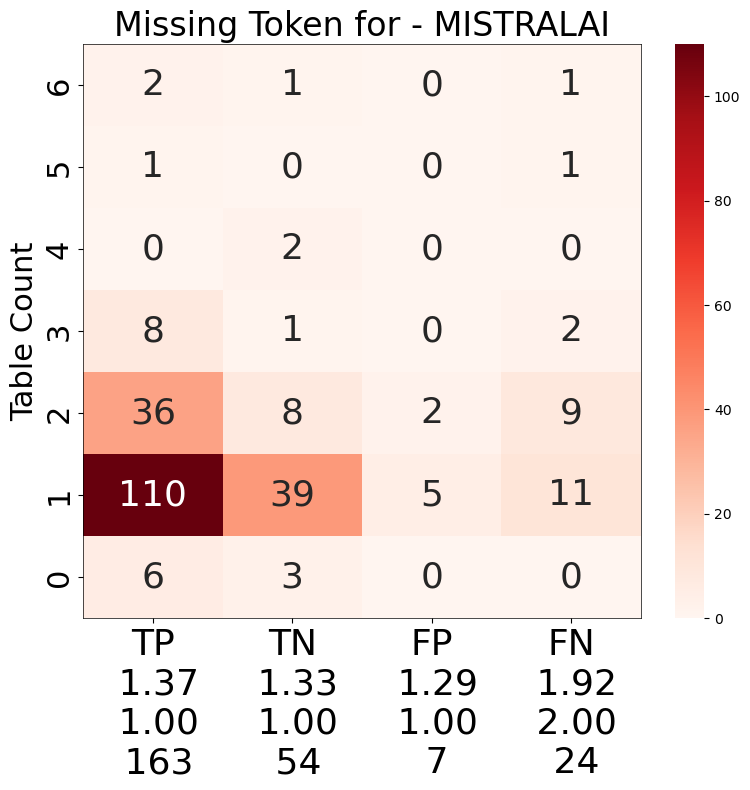

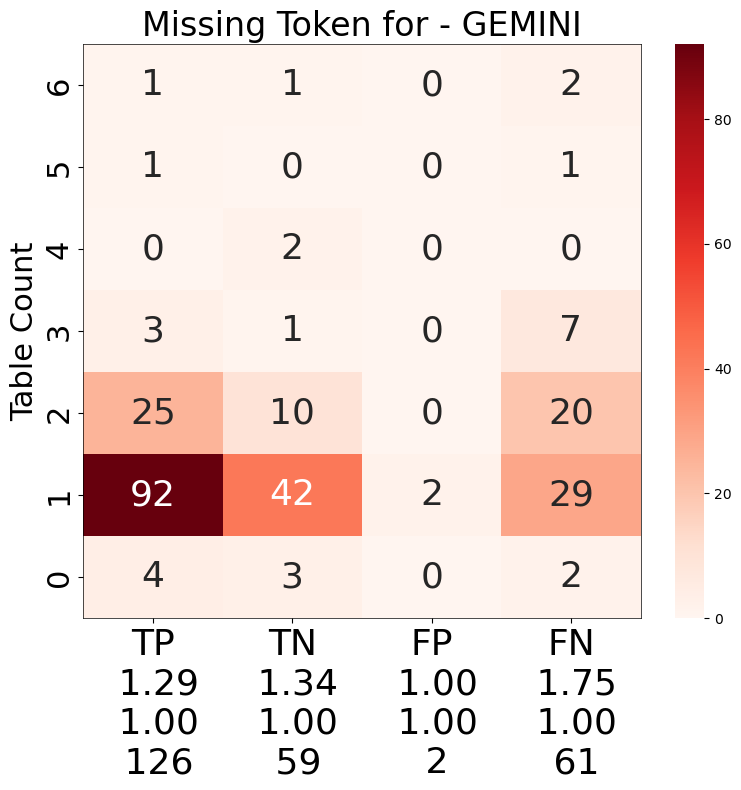

In [32]:
#Heatmap for Table count for Missing Token for sqlshare
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Disable warnings
warnings.filterwarnings("ignore")

# Define the directory for saving plots
output_directory = r'C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Load data
stats = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Stats\sqlshare_stats.csv")
missing_word = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Results of LLM\Experiments for Missing Token\missing_token_sqlshare.csv")

# Data merging
merged_df = pd.merge(stats, missing_word, on='SQL_Statement', how='inner')

# Convert 'YES'/'NO' to 1/0
merged_df['Syntax_Error_sqlshare'] = merged_df['Syntax_Error_sqlshare'].map({'YES': 1, 'NO': 0})
for llm in ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']:
    merged_df[f'Syntax_Error_{llm}'] = merged_df[f'Syntax_Error_{llm}'].map({'YES': 1, 'NO': 0}).fillna(1)

# Define the list of models
llms = ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']

# Calculate TP, TN, FP, FN
for llm in llms:
    fig, ax = plt.subplots(figsize=(8, 8))
    y_true = merged_df['Syntax_Error_sqlshare']
    y_pred = merged_df[f'Syntax_Error_{llm}']

    # Define categories
    categories = ['TP', 'TN', 'FP', 'FN']
    merged_df[f'{llm}_tp'] = (y_true == 1) & (y_pred == 1)
    merged_df[f'{llm}_tn'] = (y_true == 0) & (y_pred == 0)
    merged_df[f'{llm}_fp'] = (y_true == 0) & (y_pred == 1)
    merged_df[f'{llm}_fn'] = (y_true == 1) & (y_pred == 0)

    plot_data = pd.DataFrame()  # Initialize DataFrame to store plot data
    custom_labels = []  # Initialize list for custom labels

    for cat in categories:
        cat_name = f"{llm}_{cat.lower()}"
        true_indices = merged_df[cat_name]
        avg = merged_df.loc[true_indices, 'Table_Count'].mean() if true_indices.any() else 0
        count = true_indices.sum()
        med = merged_df.loc[true_indices, 'Table_Count'].median()
        #label = f"{cat}\nAvg: {avg:.2f}\nMed: {med:.2f}\nTotal: {count}" if count > 0 else cat
        label = f"{cat}\n {avg:.2f}\n {med:.2f}\n {count}" if count > 0 else cat
        
        # Append data to plot_data
        merged_df.loc[true_indices, 'category'] = cat
        plot_data = pd.concat([plot_data, merged_df[true_indices]])
        
        # Append label
        custom_labels.append(label)

    # Plotting heatmap
    unique_levels = pd.unique(merged_df['Table_Count']).astype(int)
    heatmap_data = pd.DataFrame(index=sorted(unique_levels, reverse=True), columns=categories)
    for category in categories:
        category_data = plot_data.loc[plot_data['category'] == category, 'Table_Count']
        count_data = category_data.value_counts().sort_index()
        heatmap_data[category] = count_data.reindex(heatmap_data.index).fillna(0)

    heatmap = sns.heatmap(heatmap_data, annot=True, cmap='Reds', fmt=".0f", annot_kws={"size": 26})
    ax.set_xticklabels(custom_labels, fontsize=26)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)
    ax.set_ylabel('Table Count', fontsize=22)
    ax.set_xlabel('')
    ax.set_title(f"Missing Token for - {llm.upper()}", fontsize=24)
    for _, spine in heatmap.spines.items():
        spine.set_visible(True)
        spine.set_edgecolor('black')
        spine.set_linewidth(0.5)
    
    plt.tight_layout()
    pdf_filename = os.path.join(output_directory, f"{llm}_Table_count_plot_missing_token_sqlshare.pdf")
    plt.savefig(pdf_filename, bbox_inches='tight')
    plt.show()
    plt.close()


#### This is for figure 9(a), where we show the relationship between the missing token type and FN for the SDSS dataset.

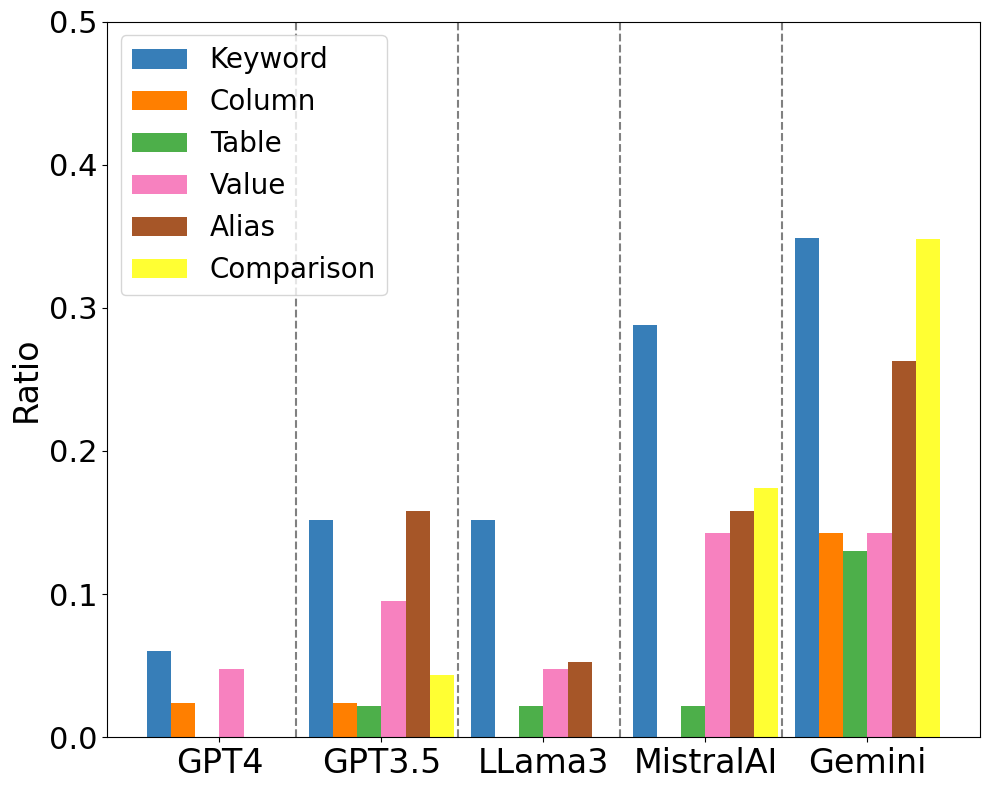

In [13]:
#for sdss Type
import matplotlib.pyplot as plt
import numpy as np
output_directory = r'C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
# Set specific data for GPT-4 and random data for other models
# Data format: models x categories
data = np.array([
    [4/66, 1/42, 0, 1/21, 0, 0],  # GPT-4: Specific counts as provided
    [10/66, 1/42, 1/46, 2/21, 3/19, 1/23],  # GPT-3.5: Random data for demonstration
    [10/66,0,1/46,1/21,1/19,0],  # LLaMA-3: Random data for demonstration
    [19/66,0,1/46,3/21,3/19,4/23],  # Mistral AI: Random data for demonstration
    [23/66,6/42,6/46,3/21,5/19,8/23]   # Gemini: Random data for demonstration
])

categories = ['Keyword', 'Column', 'Table', 'Value', 'Alias', 'Comparison']
models = ['GPT4', 'GPT3.5', 'LLama3', 'MistralAI', 'Gemini']

# Colors that are colorblind friendly
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#ffff33']  # Unique color for each category

# Setting up the bar chart
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.15  # Width of the bars
index = np.arange(len(models))

# Create bars for each category
for i, category in enumerate(categories):
    ax.bar(index + i * bar_width, data[:, i], bar_width, label=category, color=colors[i])

for i in range(1, len(models)):
    ax.axvline(x=i - bar_width, color='gray', linestyle='--')

# Labeling and aesthetics
ax.set_xlabel('')
ax.set_ylabel('Ratio',fontsize=24)
ax.set_xticks(index + bar_width * (len(categories) - 1) / 2)
ax.set_xticklabels(models, fontsize=24)
ax.set_yticks(np.arange(0, 0.6, 0.1))

#ax.set_yticks(range(0, 0.5)) 
ax.tick_params(axis='y', labelsize=22)
#ax.legend()
ax.legend(loc='upper left', fontsize=20)
plt.tight_layout()
pdf_filename = os.path.join(output_directory, f"missing_token_type_sdss.pdf")
plt.savefig(pdf_filename, bbox_inches='tight')
plt.show()
plt.close()
# Display the bar chart



#### This is for figure 9(b), where we show the relationship between the missing token type and FN for the SQLShare dataset.

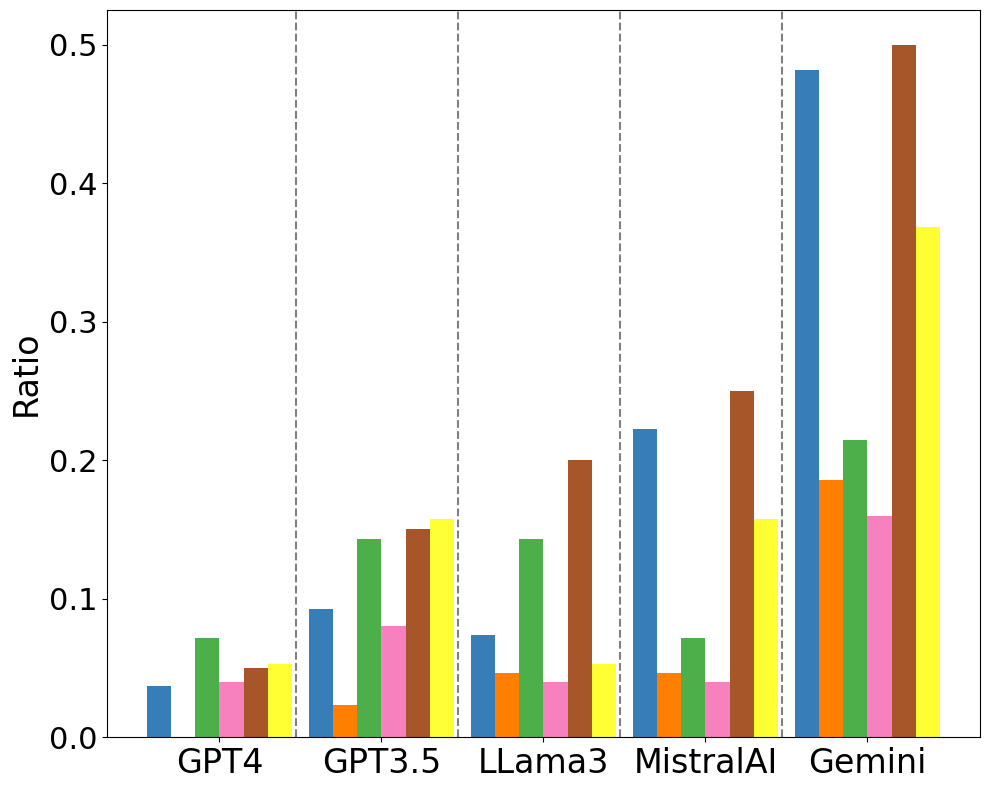

In [14]:
#for sqlshare Type
import matplotlib.pyplot as plt
import numpy as np
output_directory = r'C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
# Set specific data for GPT-4 and random data for other models
# Data format: models x categories
data = np.array([
    [2/54, 0, 2/28, 1/25, 1/20, 1/19],  # GPT-4: Specific counts as provided
    [5/54,1/43,4/28,2/25,3/20,3/19],  # GPT-3.5: Random data for demonstration
    [4/54,2/43,4/28,1/25,4/20,1/19],  # LLaMA-3: Random data for demonstration
    [12/54,2/43,2/28,1/25,5/20,3/19],  # Mistral AI: Random data for demonstration
    [26/54,8/43,6/28,4/25,10/20,7/19]   # Gemini: Random data for demonstration
])

categories = ['Keyword', 'Column', 'Table', 'Value', 'Alias', 'Comparison']
models = ['GPT4', 'GPT3.5', 'LLama3', 'MistralAI', 'Gemini']

# Colors that are colorblind friendly
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#ffff33']  # Unique color for each category

# Setting up the bar chart
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.15  # Width of the bars
index = np.arange(len(models))

# Create bars for each category
for i, category in enumerate(categories):
    ax.bar(index + i * bar_width, data[:, i], bar_width, label=category, color=colors[i])

for i in range(1, len(models)):
    ax.axvline(x=i - bar_width, color='gray', linestyle='--')

# Labeling and aesthetics
ax.set_xlabel('')
ax.set_ylabel('Ratio',fontsize=24)
ax.set_xticks(index + bar_width * (len(categories) - 1) / 2)
ax.set_xticklabels(models, fontsize=24)
ax.set_yticks(np.arange(0, 0.6, 0.1))

#ax.set_yticks(range(0, 0.5)) 
ax.tick_params(axis='y', labelsize=22)
#ax.legend()
plt.tight_layout()
pdf_filename = os.path.join(output_directory, f"missing_token_type_sqlshare.pdf")
plt.savefig(pdf_filename, bbox_inches='tight')
plt.show()
plt.close()
# Display the bar chart



#### This is for figure 9(c), where we show the relationship between the missing token type and FN for the Join-Order dataset.

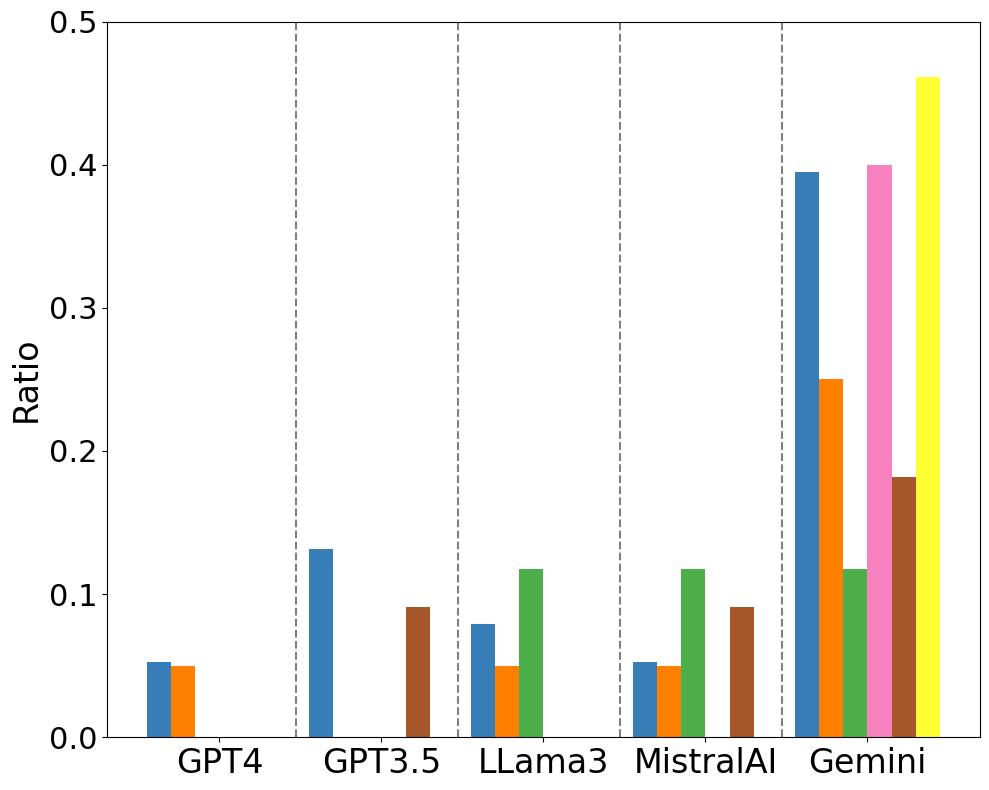

In [15]:
#for join Type
import matplotlib.pyplot as plt
import numpy as np
output_directory = r'C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
# Set specific data for GPT-4 and random data for other models
# Data format: models x categories
data = np.array([
    [2/38, 1/20, 0, 0, 0, 0],  # GPT-4: Specific counts as provided
    [5/38,0,0,0,1/11,0],  # GPT-3.5: Random data for demonstration
    [3/38,1/20,2/17,0,0,0],  # LLaMA-3: Random data for demonstration
    [2/38,1/20,2/17,0,1/11,0],  # Mistral AI: Random data for demonstration
    [15/38,5/20,2/17,4/10,2/11,6/13]   # Gemini: Random data for demonstration
])

categories = ['Keyword', 'Column', 'Table', 'Value', 'Alias', 'Comparison']
models = ['GPT4', 'GPT3.5', 'LLama3', 'MistralAI', 'Gemini']

# Colors that are colorblind friendly
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#ffff33']  # Unique color for each category

# Setting up the bar chart
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.15  # Width of the bars
index = np.arange(len(models))

# Create bars for each category
for i, category in enumerate(categories):
    ax.bar(index + i * bar_width, data[:, i], bar_width, label=category, color=colors[i])
    
for i in range(1, len(models)):
    ax.axvline(x=i - bar_width, color='gray', linestyle='--')

# Labeling and aesthetics
ax.set_xlabel('')
ax.set_ylabel('Ratio',fontsize=24)
ax.set_xticks(index + bar_width * (len(categories) - 1) / 2)
ax.set_xticklabels(models, fontsize=24)
ax.set_yticks(np.arange(0, 0.6, 0.1))

#ax.set_yticks(range(0, 0.5)) 
ax.tick_params(axis='y', labelsize=22)
#ax.legend()
plt.tight_layout()
pdf_filename = os.path.join(output_directory, f"missing_token_type_join.pdf")
plt.savefig(pdf_filename, bbox_inches='tight')
plt.show()
plt.close()
#fig.savefig('missing_token_type_join.pdf', format='pdf')
# Display the bar chart
#plt.show()



#### This is for figure 10(a), where we show the task 'Performance Prediction' for the statistical property 'word count' in the SDSS dataset. We produced results for 5 LLMs, but we used only Mistralai for the paper.

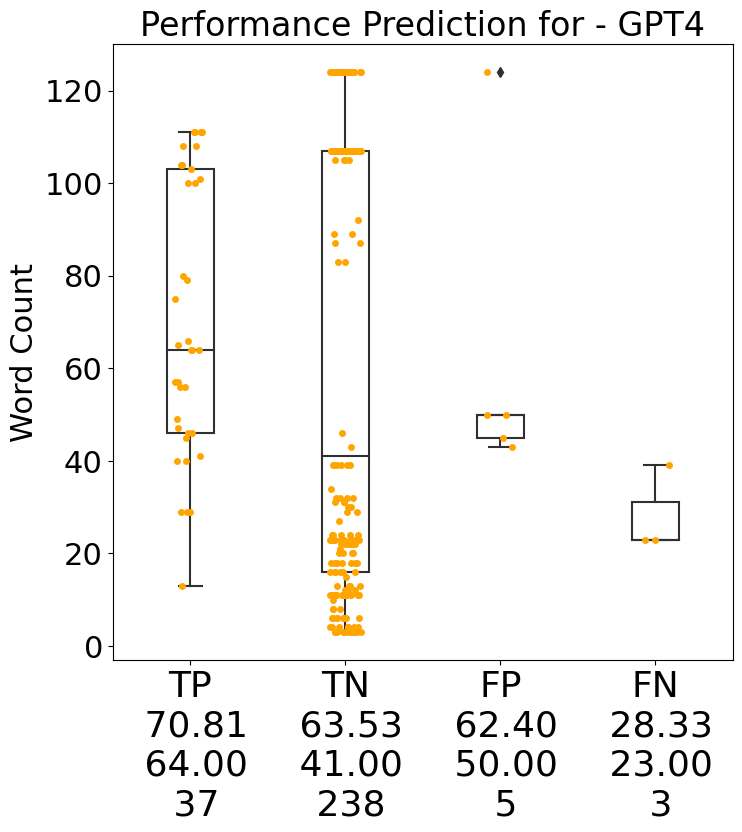

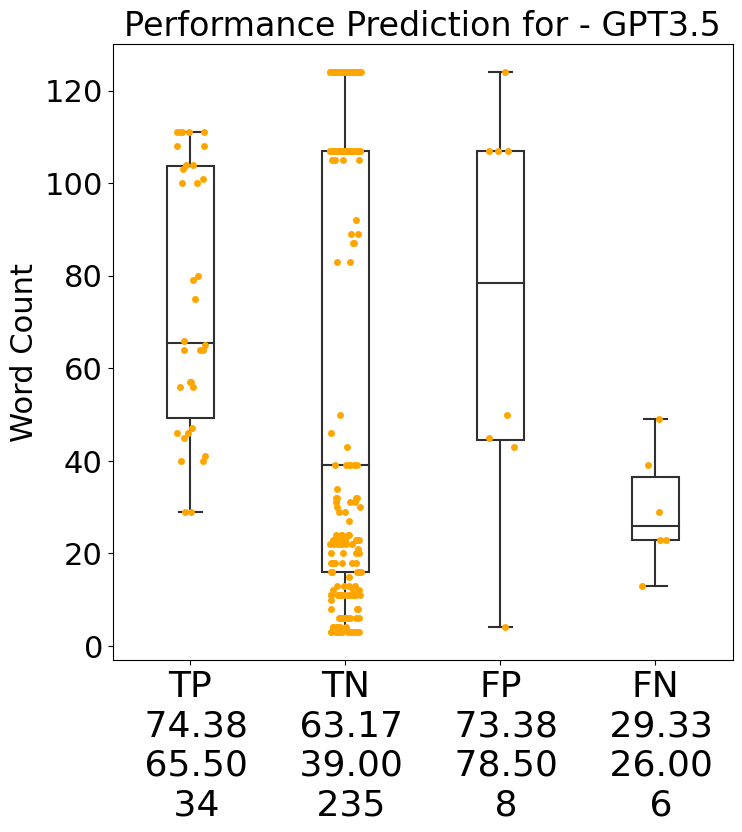

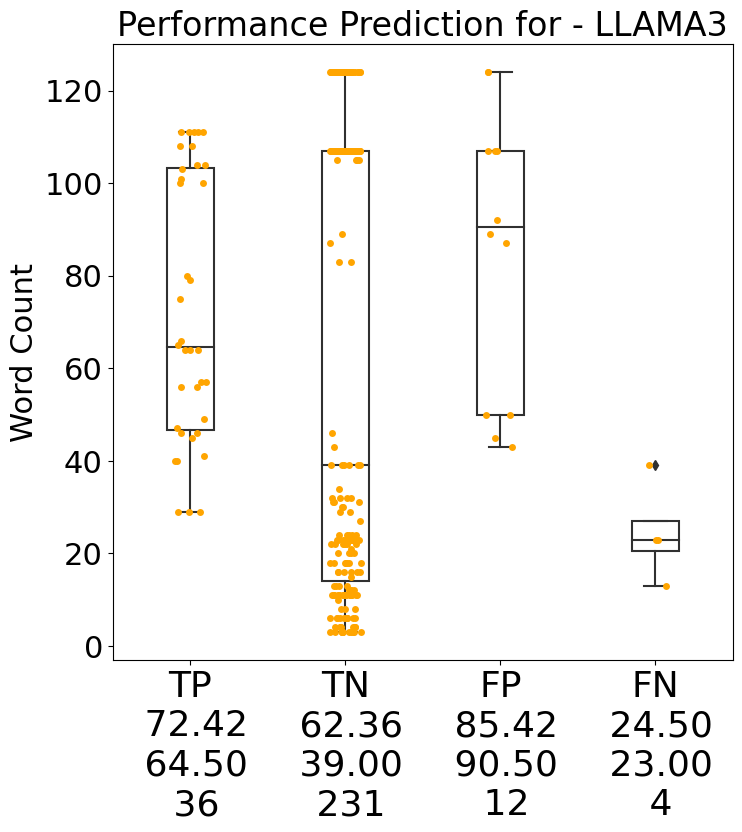

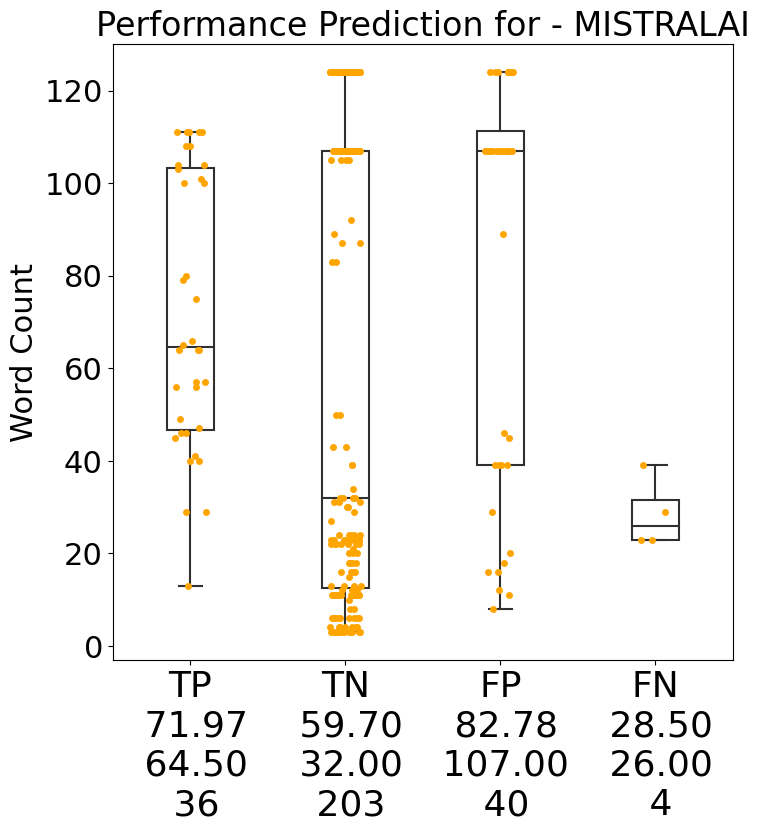

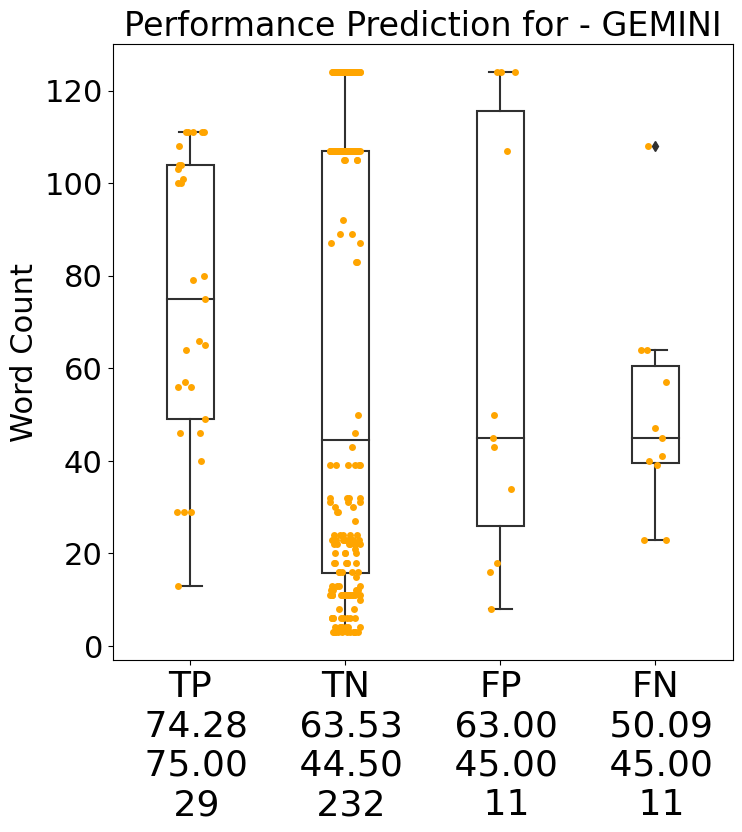

In [33]:

#for runtime word count
#works perfectly well number of TP,TN,FP,FN and plot in the x axis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Disable warnings
warnings.filterwarnings("ignore")

# Define the directory for saving plots
output_directory = r'C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Load data
stats = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Stats\sdss_stats.csv")
missing_word = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Results of LLM\Experiments for Runtime\sdss_runtime.csv")

# Data merging
merged_df = pd.merge(stats, missing_word, on='SQL_Statement', how='inner')

# Convert 'YES'/'NO' to 1/0
merged_df['Original'] = merged_df['Original'].map({'YES': 1, 'NO': 0})
for llm in ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']:
    merged_df[llm] = merged_df[llm].map({'YES': 1, 'NO': 0}).fillna(1)

# Define the list of models
llms = ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']

# Plotting loop
for llm in llms:
    fig, ax = plt.subplots(figsize=(8, 8))

    y_true = merged_df['Original']
    y_pred = merged_df[llm]

    # Calculate TP, TN, FP, FN
    merged_df[f'{llm}_tp'] = (y_true == 1) & (y_pred == 1)
    merged_df[f'{llm}_tn'] = (y_true == 0) & (y_pred == 0)
    merged_df[f'{llm}_fp'] = (y_true == 0) & (y_pred == 1)
    merged_df[f'{llm}_fn'] = (y_true == 1) & (y_pred == 0)

    # Prepare data for plotting
    categories = [f'{llm}_tp', f'{llm}_tn', f'{llm}_fp', f'{llm}_fn']
    custom_labels = []
    plot_data = []

    for cat in categories:
        # Calculate average and total correctly
        true_indices = merged_df[cat] == True
        avg = merged_df.loc[true_indices, 'Word_Count'].mean() if true_indices.any() else 0
        med = merged_df.loc[true_indices, 'Word_Count'].median()
        count = true_indices.sum()
        label_part = cat.split('_')[-1].upper()
        label = f"{label_part}\n {avg:.2f}\n {med:.2f}\n {count}" if count > 0 else cat
        #label = f"{cat.split('_')[-1].upper()} ({avg:.2f}/{count})"
        custom_labels.append(label)
        merged_df['category'] = cat
        plot_data.append(merged_df[true_indices].copy())

    plot_data = pd.concat(plot_data)

    if not plot_data.empty:
        sns.boxplot(x='category', y='Word_Count', data=plot_data, palette=sns.color_palette("colorblind"), width=0.3, ax=ax, boxprops=dict(facecolor='none'))
        sns.stripplot(x='category', y='Word_Count', data=plot_data, color='orange', size=5, jitter=True, ax=ax)
        #sns.histplot(x='category', y='Function_Count', data=plot_data)
        
        ax.set_xticklabels(custom_labels, rotation=0, ha='center', fontsize=26)
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)  # Set y-axis labels font size
        ax.set_ylabel('Word Count',fontsize=22)
        ax.set_xlabel('')
        #plt.show()
        ax.set_title(f"Performance Prediction for - {llm.upper()}", fontsize=24)

    # Show the plot with title
    
    # Save plots as PDF
    pdf_filename = os.path.join(output_directory, f"{llm}_word_count_plot_runtime_sdss.pdf")
    plt.savefig(pdf_filename, bbox_inches='tight')
    plt.show()
    plt.close(fig)
    
    # Unique SQL statements in each DataFrame


#### This is for figure 10(b), where we show the task 'Performance Prediction' for the statistical property 'Column Count' in the SDSS dataset. We produced results for 5 LLMs, but we used only Mistralai for the paper.

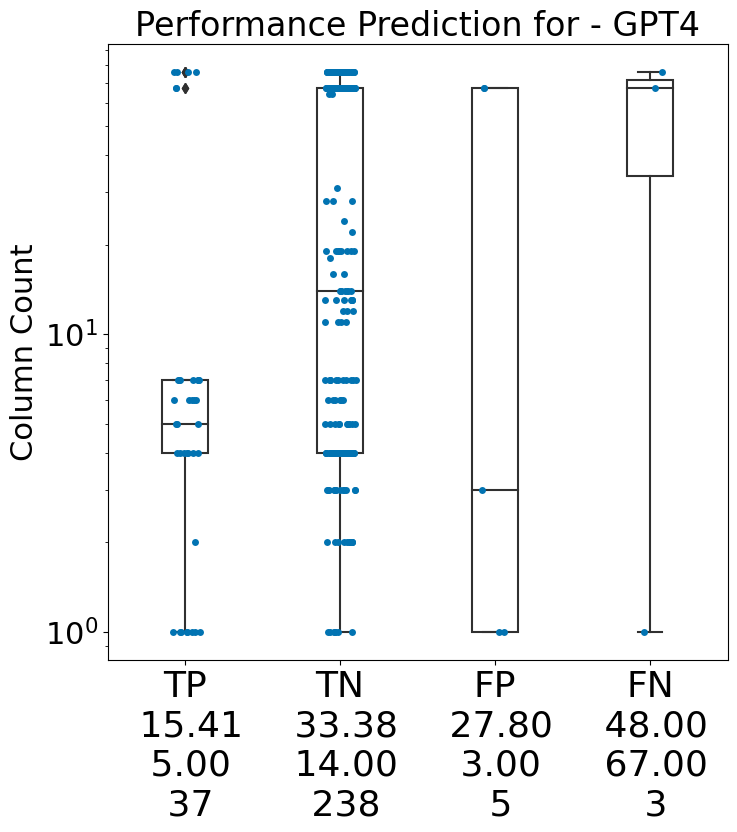

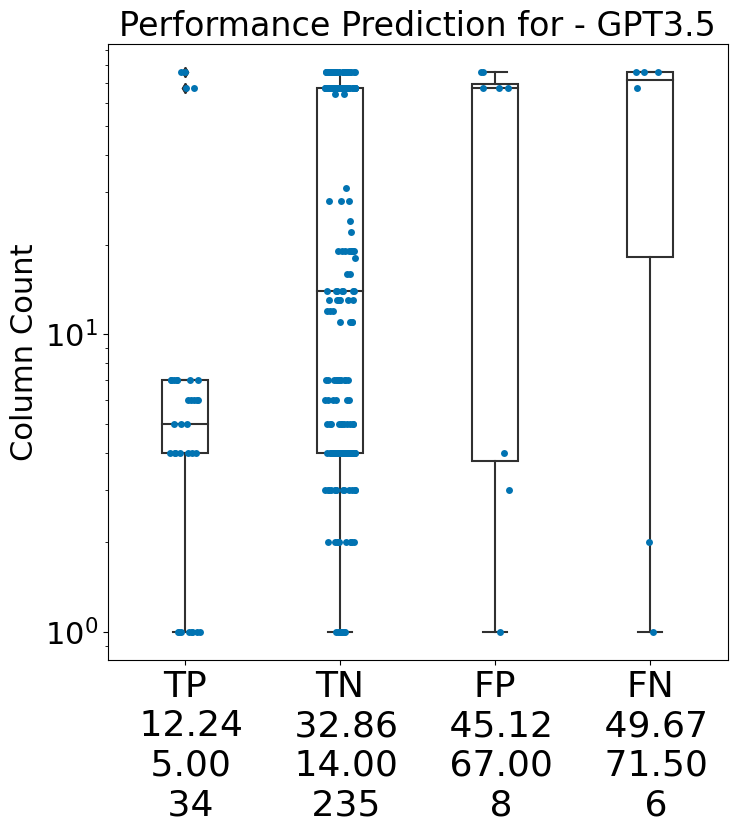

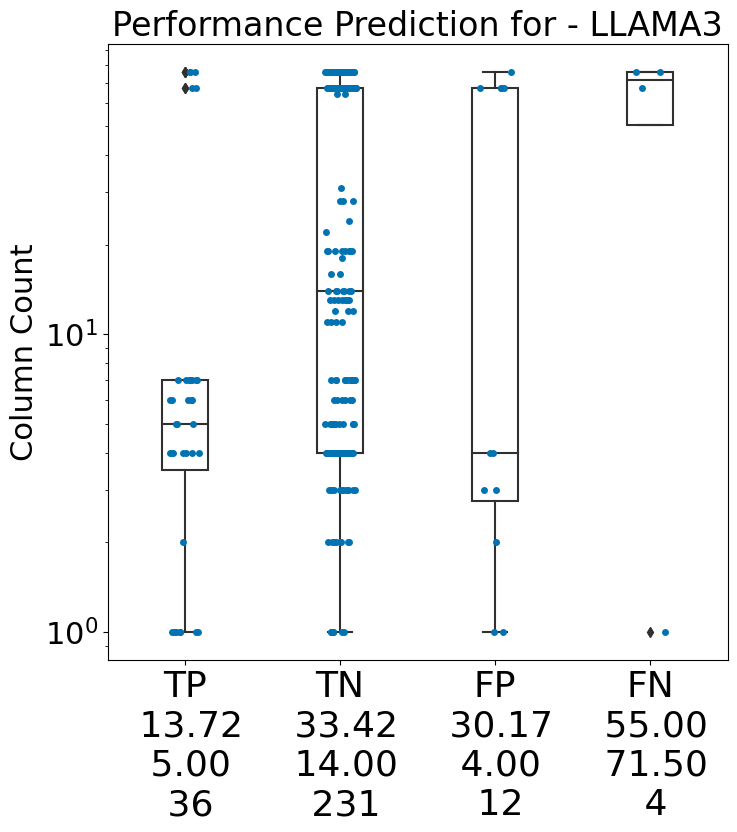

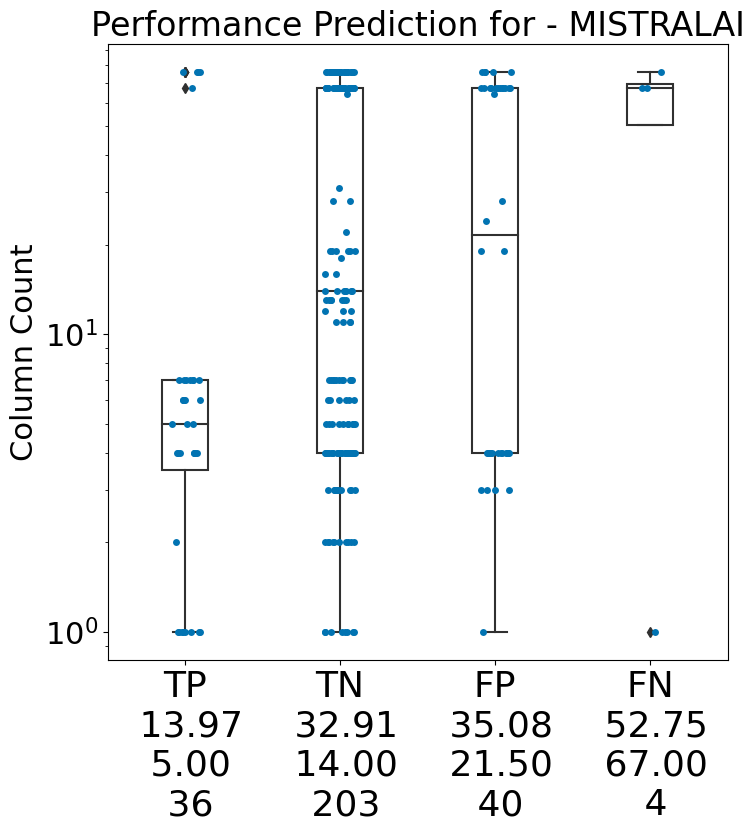

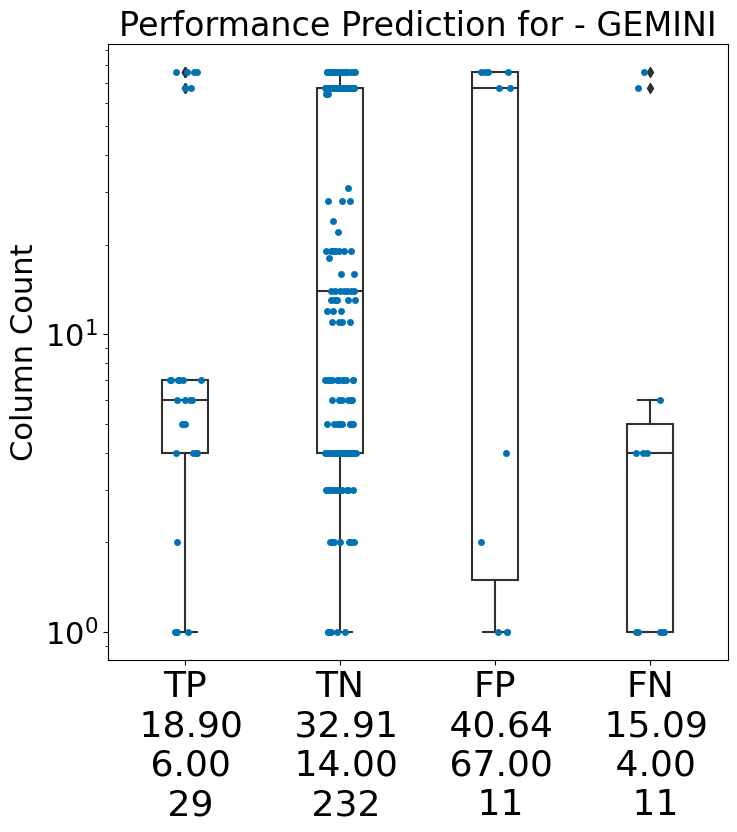

In [34]:
#runtime with sdss for column count as it has no value for FN in gpt4 and mistralai
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Disable warnings
warnings.filterwarnings("ignore")

# Define the directory for saving plots
output_directory = r'C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Load data
stats = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Stats\sdss_stats.csv")
missing_word = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Results of LLM\Experiments for Runtime\sdss_runtime.csv")

# Data merging
merged_df = pd.merge(stats, missing_word, on='SQL_Statement', how='inner')

# Convert 'YES'/'NO' to 1/0
merged_df['Original'] = merged_df['Original'].map({'YES': 1, 'NO': 0})
for llm in ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']:
    merged_df[llm] = merged_df[llm].map({'YES': 1, 'NO': 0}).fillna(1)

# Define the list of models
llms = ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']

# Plotting loop
for llm in llms:
    fig, ax = plt.subplots(figsize=(8, 8))

    y_true = merged_df['Original']
    y_pred = merged_df[llm]
    # Calculate TP, TN, FP, FN
    merged_df[f'{llm}_tp'] = (y_true == 1) & (y_pred == 1)
    merged_df[f'{llm}_tn'] = (y_true == 0) & (y_pred == 0)
    merged_df[f'{llm}_fp'] = (y_true == 0) & (y_pred == 1)
    merged_df[f'{llm}_fn'] = (y_true == 1) & (y_pred == 0)

    # Initialize data structure for categories
    plot_data = pd.DataFrame()
    categories = ['TP', 'TN', 'FP', 'FN']
    custom_labels = []

    # Loop through each category to collect data and labels
    for cat in categories:
        cat_name = f"{llm}_{cat.lower()}"
        true_indices = merged_df[cat_name]
        avg = merged_df.loc[true_indices, 'Column_Count'].mean() if true_indices.any() else 0
        med = merged_df.loc[true_indices, 'Column_Count'].median()
        count = true_indices.sum()
        label_part = cat.split('_')[-1].upper()
        label = f"{label_part}\n {avg:.2f}\n {med:.2f}\n {count}"
        # Append data to plot_data
        merged_df.loc[true_indices, 'category'] = cat
        plot_data = pd.concat([plot_data, merged_df[true_indices]])

        # Append label
        custom_labels.append(label)

    # Ensure all categories are represented, even if empty
    plot_data['category'] = pd.Categorical(plot_data['category'], categories=categories, ordered=True)

    # Plot boxplot and stripplot
    sns.boxplot(x='category', y='Column_Count', data=plot_data, order=categories, palette=sns.color_palette("colorblind"), width=0.3, ax=ax, boxprops=dict(facecolor='none'))
    sns.stripplot(x='category', y='Column_Count', data=plot_data, order=categories, color=(1/255, 115/255, 178/255), size=5, jitter=True, ax=ax)

    # Set x-ticks and labels
    ax.set_xticks(range(len(custom_labels)))
    ax.set_xticklabels(custom_labels, rotation=0, ha='center',fontsize=26)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)  # Set y-axis labels font size
    ax.set_yscale('log')  
    ax.set_ylabel('Column Count', fontsize=22)
    ax.set_xlabel('')
    ax.set_title(f"Performance Prediction for - {llm.upper()}", fontsize=24)

    # Show the plot with title
    
    # Save plots as PDF
    pdf_filename = os.path.join(output_directory, f"{llm}_Column_count_plot_runtime_sdss.pdf")
    plt.savefig(pdf_filename, bbox_inches='tight')
    plt.show()
    plt.close(fig)


#### This is for figure 11(a), where we show the task Equivalence for the statistical property word count in the SDSS dataset. We produced results for 5 LLMs, but we used only GPT-3.5 for the paper.

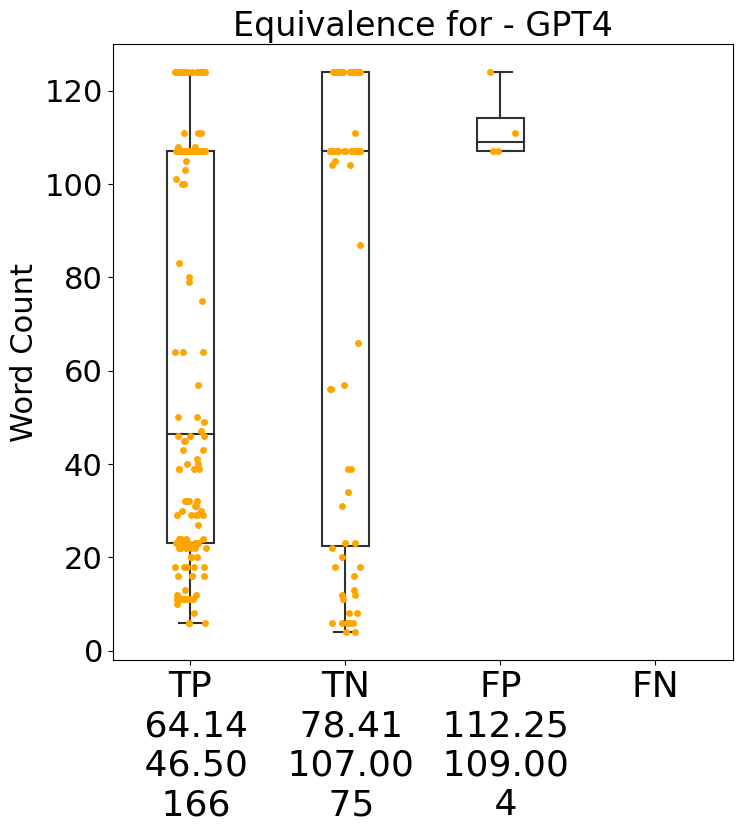

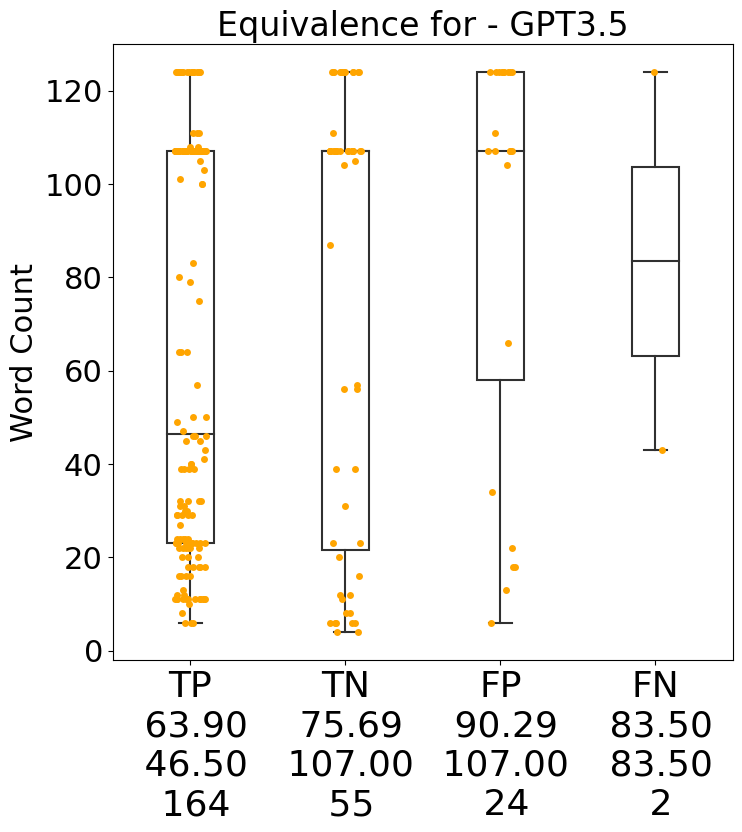

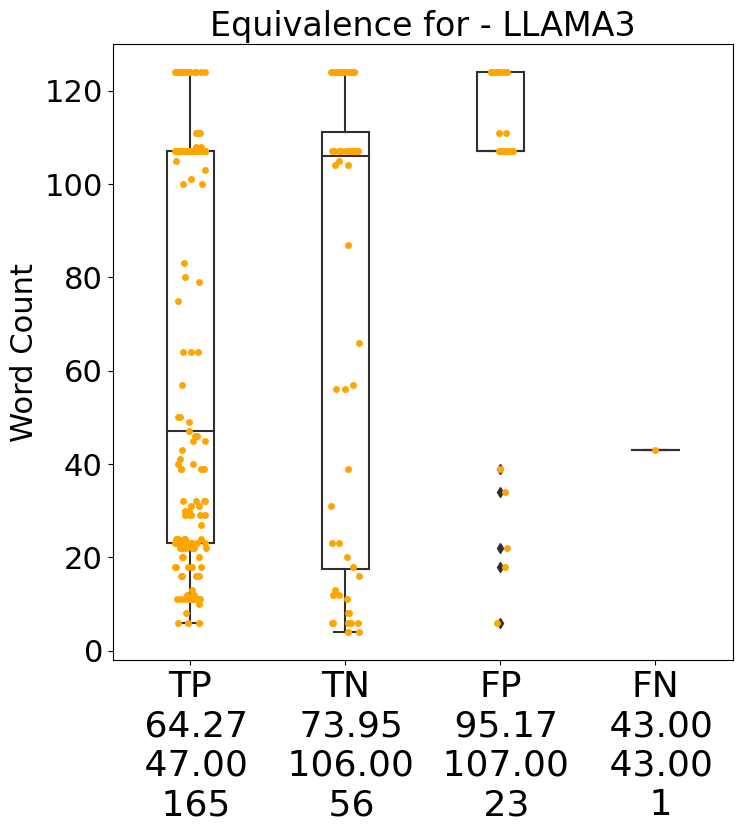

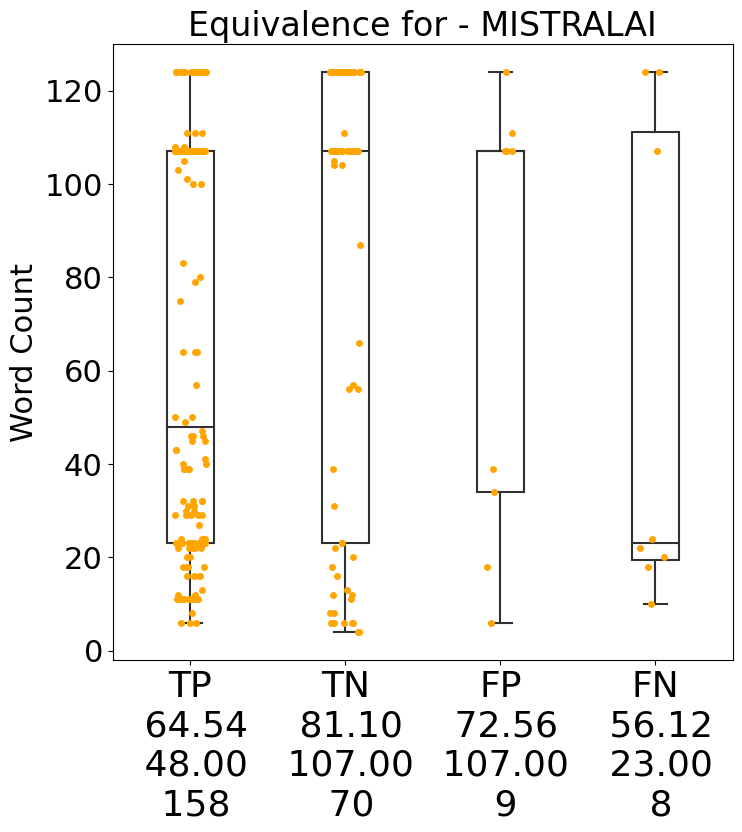

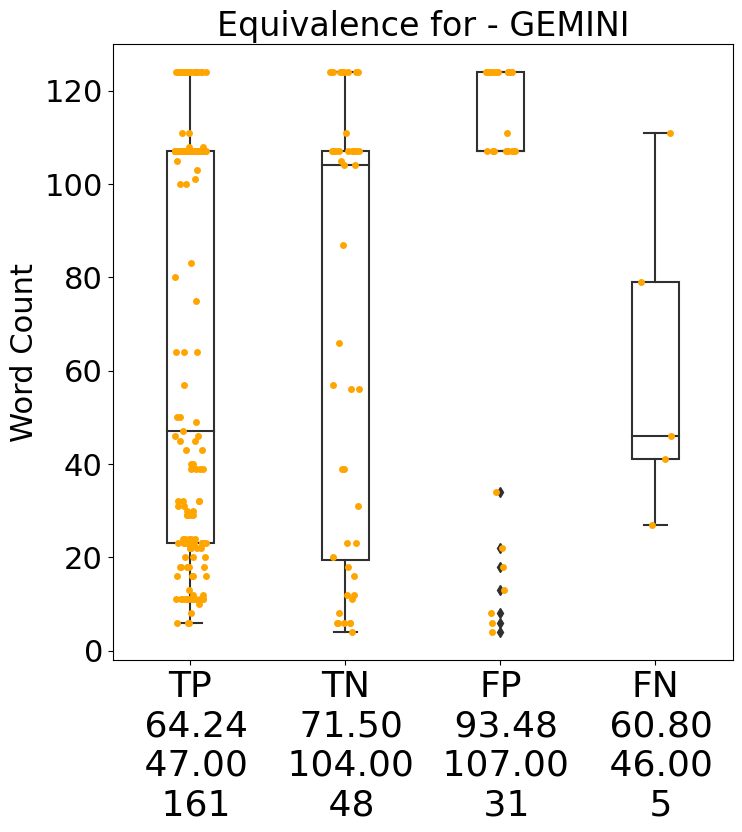

In [35]:
#word count equi with sdss as it has no value for FN in gpt4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Disable warnings
warnings.filterwarnings("ignore")

# Define the directory for saving plots
output_directory = r'C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Load data
stats = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Stats\sdss_stats.csv")
missing_word = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Results of LLM\Experiments for Equivalence\equi_sdss.csv")

# Data merging
merged_df = pd.merge(stats, missing_word, on='SQL_Statement', how='inner')

# Convert 'YES'/'NO' to 1/0
merged_df['Original'] = merged_df['Original'].map({'YES': 1, 'NO': 0})
for llm in ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']:
    merged_df[llm] = merged_df[llm].map({'YES': 1, 'NO': 0}).fillna(1)

# Define the list of models
llms = ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']

# Plotting loop
for llm in llms:
    fig, ax = plt.subplots(figsize=(8, 8))

    y_true = merged_df['Original']
    y_pred = merged_df[llm]

    # Calculate TP, TN, FP, FN
    merged_df[f'{llm}_tp'] = (y_true == 1) & (y_pred == 1)
    merged_df[f'{llm}_tn'] = (y_true == 0) & (y_pred == 0)
    merged_df[f'{llm}_fp'] = (y_true == 0) & (y_pred == 1)
    merged_df[f'{llm}_fn'] = (y_true == 1) & (y_pred == 0)

    # Initialize data structure for categories
    plot_data = pd.DataFrame()
    categories = ['TP', 'TN', 'FP', 'FN']
    custom_labels = []

    # Loop through each category to collect data and labels
    for cat in categories:
        cat_name = f"{llm}_{cat.lower()}"
        true_indices = merged_df[cat_name]
        avg = merged_df.loc[true_indices, 'Word_Count'].mean() if true_indices.any() else 0
        med = merged_df.loc[true_indices, 'Word_Count'].median()
        count = true_indices.sum()
        label_part = cat.split('_')[-1].upper()
        label = f"{label_part}\n {avg:.2f}\n {med:.2f}\n {count}" if count > 0 else cat
        # Append data to plot_data
        merged_df.loc[true_indices, 'category'] = cat
        plot_data = pd.concat([plot_data, merged_df[true_indices]])

        # Append label
        custom_labels.append(label)

    # Ensure all categories are represented, even if empty
    plot_data['category'] = pd.Categorical(plot_data['category'], categories=categories, ordered=True)

    # Plot boxplot and stripplot
    sns.boxplot(x='category', y='Word_Count', data=plot_data, order=categories, palette=sns.color_palette("colorblind"), width=0.3, ax=ax, boxprops=dict(facecolor='none'))
    sns.stripplot(x='category', y='Word_Count', data=plot_data, order=categories, color='orange', size=5, jitter=True, ax=ax)

    # Set x-ticks and labels
    ax.set_xticks(range(len(custom_labels)))
    ax.set_xticklabels(custom_labels, rotation=0, ha='center',fontsize=26)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)  # Set y-axis labels font size
    ax.set_ylabel('Word Count', fontsize=22)
    ax.set_xlabel('')
    ax.set_title(f"Equivalence for - {llm.upper()}", fontsize=24)

    # Show the plot with title
    
    # Save plots as PDF
    pdf_filename = os.path.join(output_directory, f"{llm}_word_count_plot_equi_sdss.pdf")
    plt.savefig(pdf_filename, bbox_inches='tight')
    plt.show()
    plt.close(fig)


#### This is for figure 11(b), where we show the task 'Equivalence' for the statistical property 'word count' in the Join-Order dataset. We produced results for 5 LLMs, but we used only Llama3 for the paper.

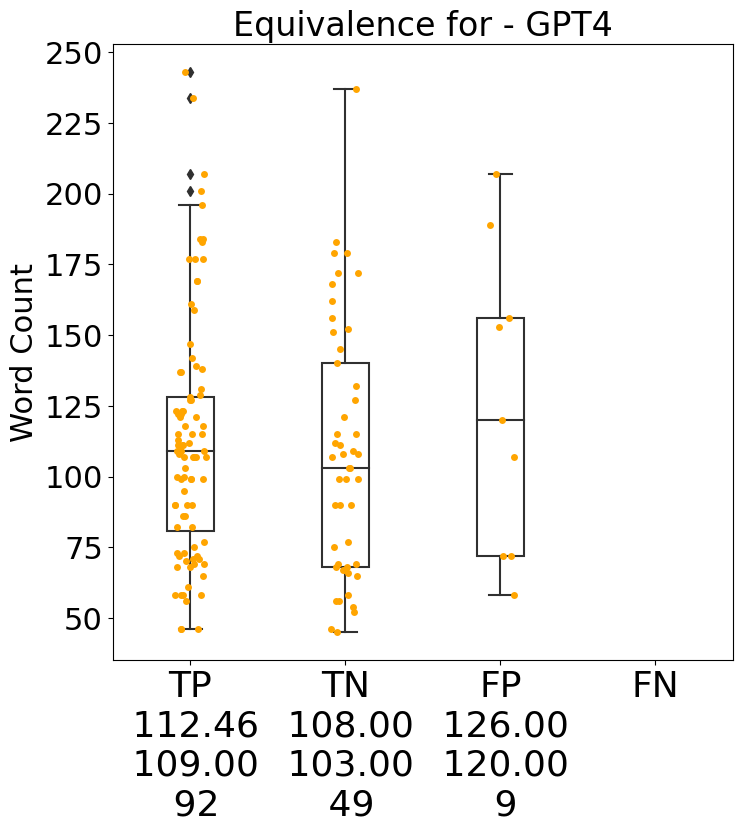

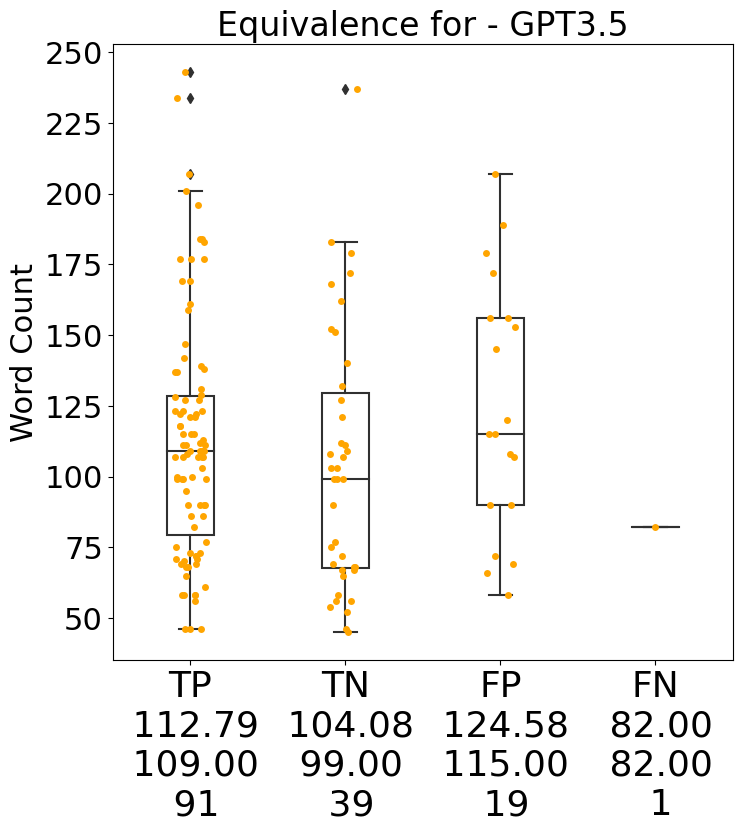

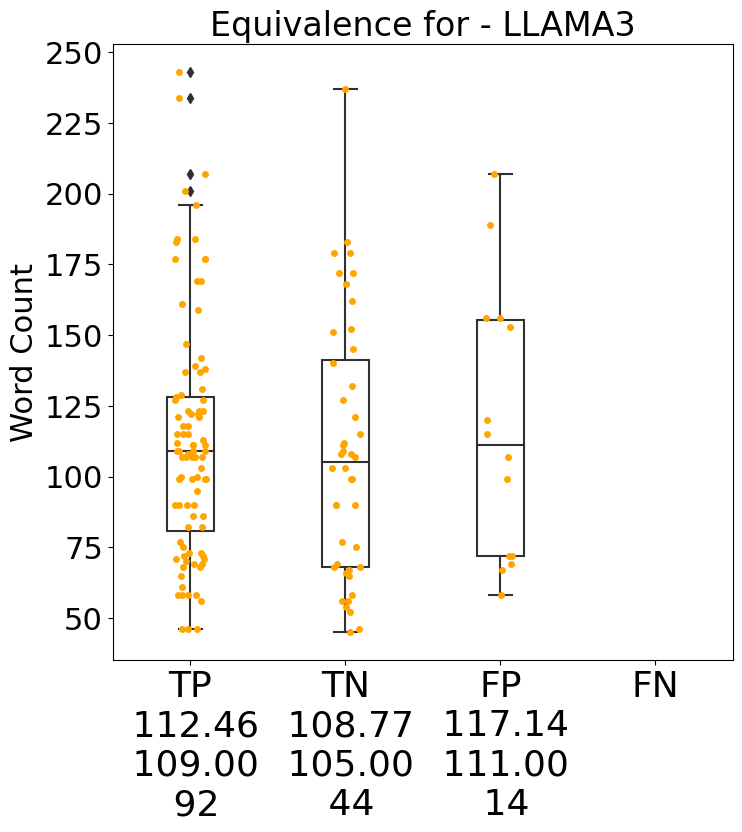

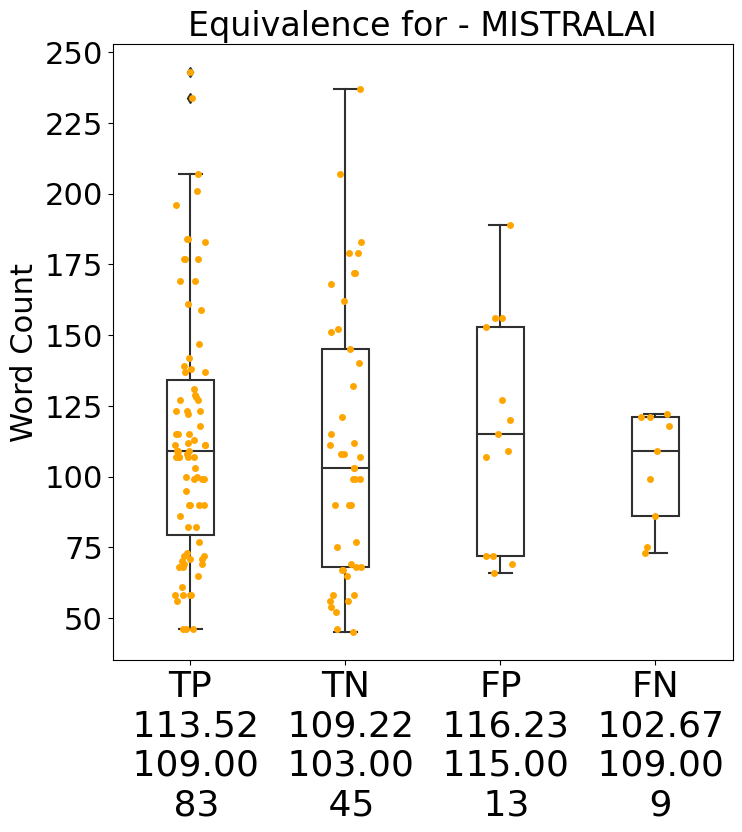

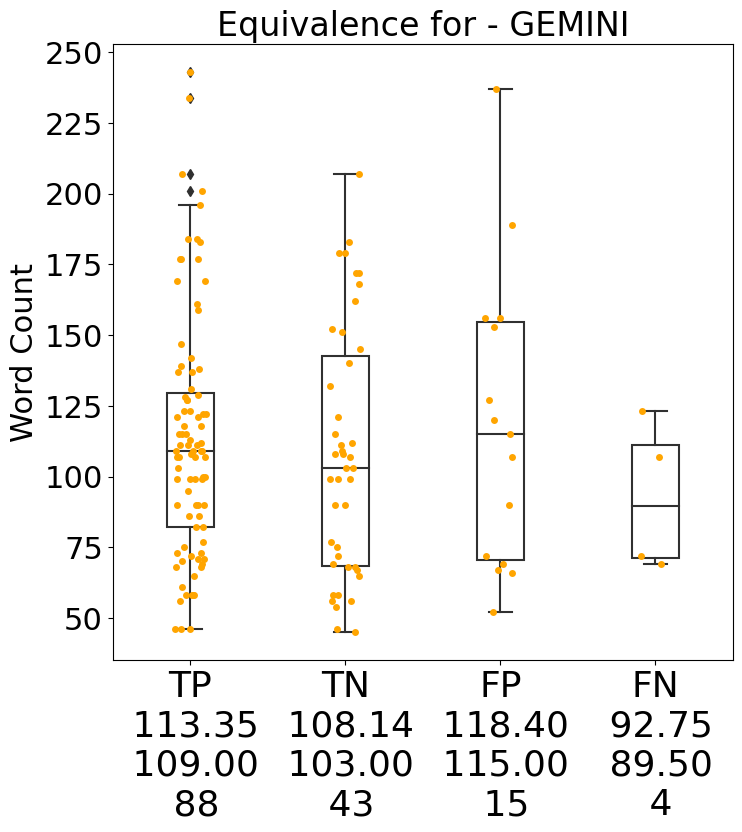

In [36]:
#word count equi with join 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Disable warnings
warnings.filterwarnings("ignore")

# Define the directory for saving plots
output_directory = r'C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Load data
stats = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Stats\join_stats.csv")
missing_word = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Results of LLM\Experiments for Equivalence\equi_join.csv")

# Data merging
merged_df = pd.merge(stats, missing_word, on='SQL_Statement', how='inner')

# Convert 'YES'/'NO' to 1/0
merged_df['Original'] = merged_df['Original'].map({'YES': 1, 'NO': 0})
for llm in ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']:
    merged_df[llm] = merged_df[llm].map({'YES': 1, 'NO': 0}).fillna(1)

# Define the list of models
llms = ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']

# Plotting loop
for llm in llms:
    fig, ax = plt.subplots(figsize=(8, 8))

    y_true = merged_df['Original']
    y_pred = merged_df[llm]

    # Calculate TP, TN, FP, FN
    merged_df[f'{llm}_tp'] = (y_true == 1) & (y_pred == 1)
    merged_df[f'{llm}_tn'] = (y_true == 0) & (y_pred == 0)
    merged_df[f'{llm}_fp'] = (y_true == 0) & (y_pred == 1)
    merged_df[f'{llm}_fn'] = (y_true == 1) & (y_pred == 0)

    # Initialize data structure for categories
    plot_data = pd.DataFrame()
    categories = ['TP', 'TN', 'FP', 'FN']
    custom_labels = []

    # Loop through each category to collect data and labels
    for cat in categories:
        cat_name = f"{llm}_{cat.lower()}"
        true_indices = merged_df[cat_name]
        avg = merged_df.loc[true_indices, 'Word_Count'].mean() if true_indices.any() else 0
        med = merged_df.loc[true_indices, 'Word_Count'].median()
        count = true_indices.sum()
        label_part = cat.split('_')[-1].upper()
        label = f"{label_part}\n {avg:.2f}\n {med:.2f}\n {count}" if count > 0 else cat
        
        # Append data to plot_data
        merged_df.loc[true_indices, 'category'] = cat
        plot_data = pd.concat([plot_data, merged_df[true_indices]])

        # Append label
        custom_labels.append(label)

    # Ensure all categories are represented, even if empty
    plot_data['category'] = pd.Categorical(plot_data['category'], categories=categories, ordered=True)

    # Plot boxplot and stripplot
    sns.boxplot(x='category', y='Word_Count', data=plot_data, order=categories, palette=sns.color_palette("colorblind"), width=0.3, ax=ax, boxprops=dict(facecolor='none'))
    sns.stripplot(x='category', y='Word_Count', data=plot_data, order=categories, color='orange', size=5, jitter=True, ax=ax)

    # Set x-ticks and labels
    ax.set_xticks(range(len(custom_labels)))
    ax.set_xticklabels(custom_labels, rotation=0, ha='center',fontsize=26)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)  # Set y-axis labels font size
    ax.set_ylabel('Word Count', fontsize=22)
    ax.set_xlabel('')
    ax.set_title(f"Equivalence for - {llm.upper()}", fontsize=24)

    # Show the plot with title
    
    
    # Save plots as PDF
    pdf_filename = os.path.join(output_directory, f"{llm}_word_count_plot_equi_join.pdf")
    plt.savefig(pdf_filename, bbox_inches='tight')
    plt.show()
    plt.close(fig)


#### This is for figure 12(a), where we show the task 'Equivalence' for the statistical property 'Predicate Count' in the SDSS dataset. We produced results for 5 LLMs, but we used only Gemini for the paper.

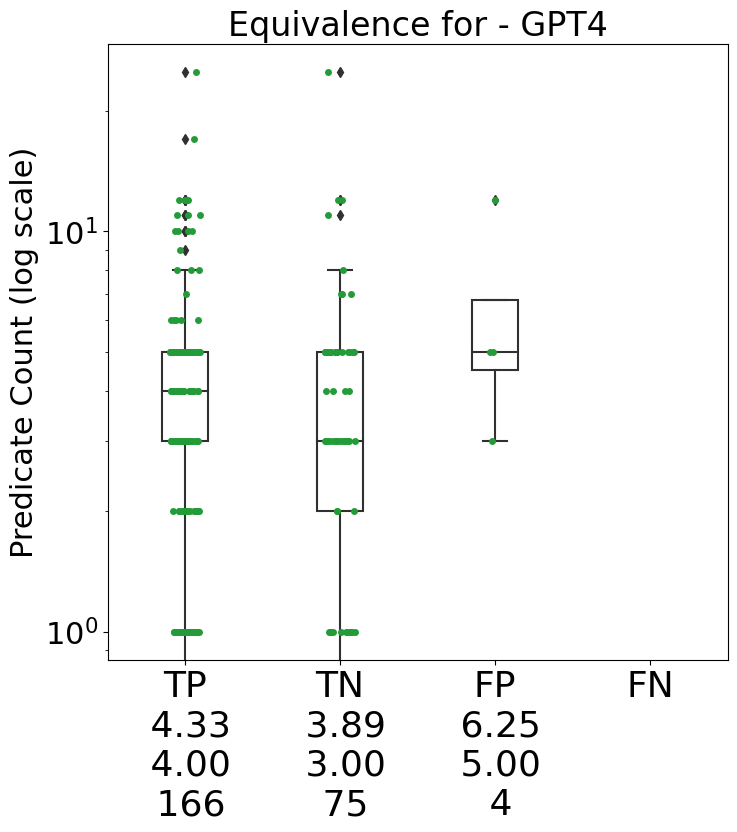

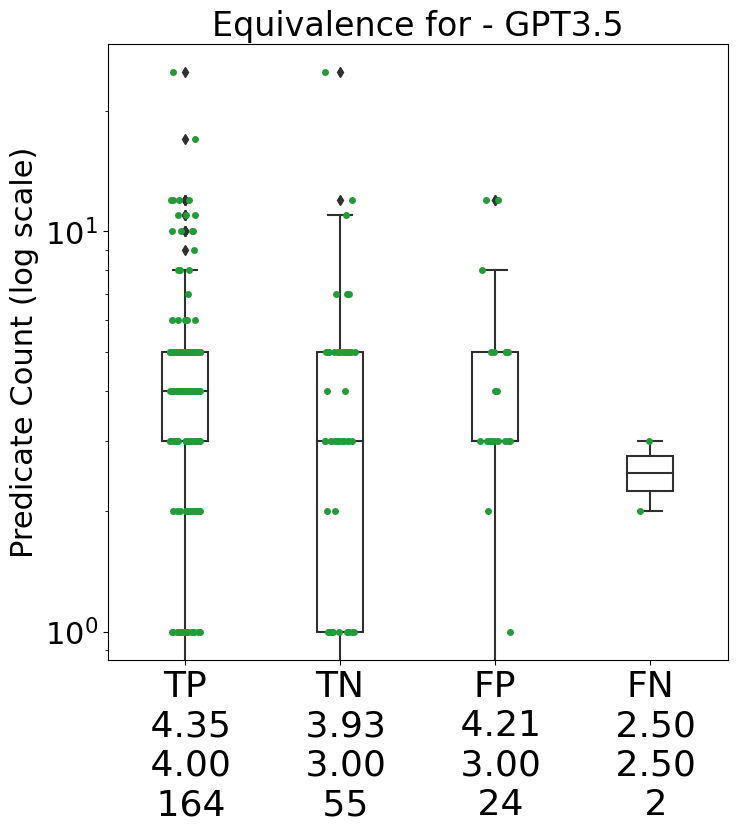

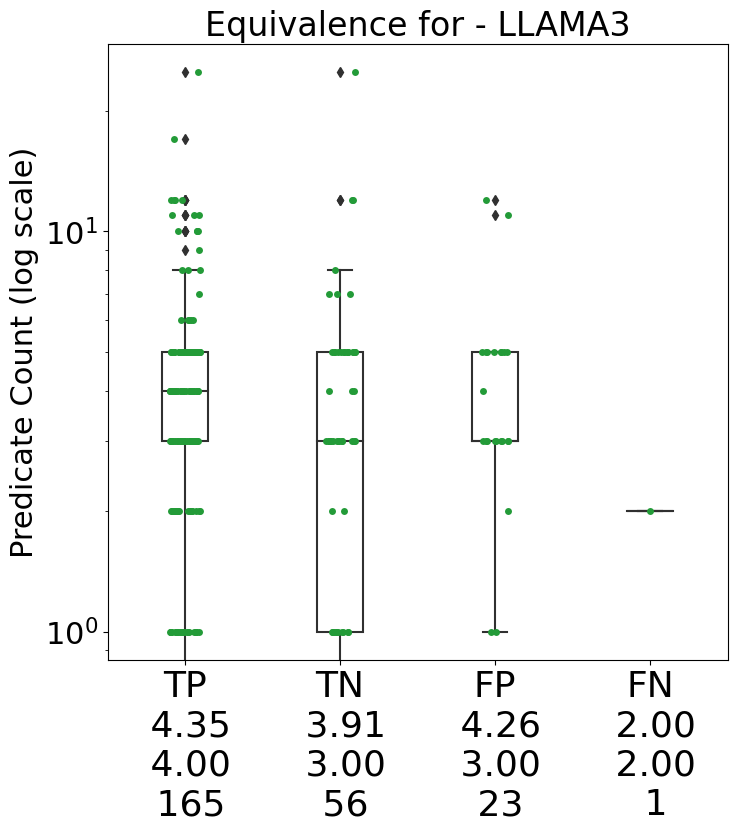

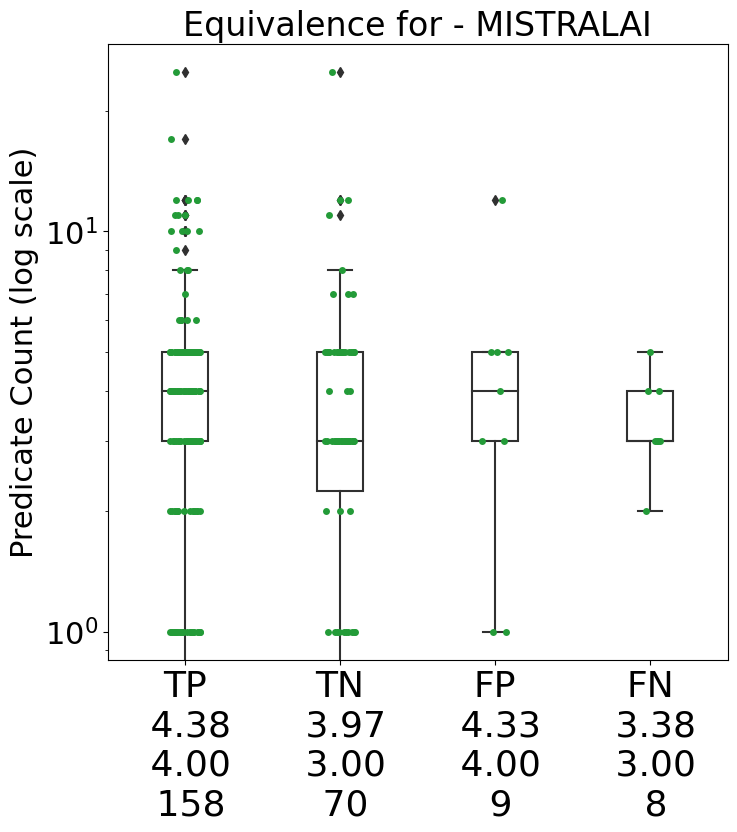

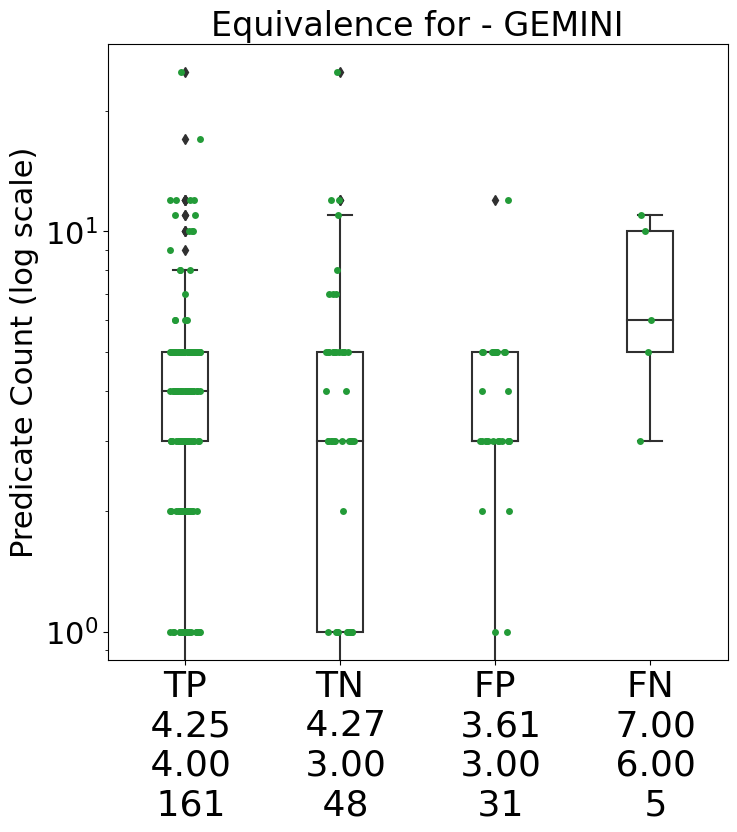

In [37]:
#equi with sdss for predicate count as it has no value for FN in gpt4 and mistralai
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Disable warnings
warnings.filterwarnings("ignore")

# Define the directory for saving plots
output_directory = r'C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Load data
stats = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Stats\sdss_stats.csv")
missing_word = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Results of LLM\Experiments for Equivalence\equi_sdss.csv")

# Data merging
merged_df = pd.merge(stats, missing_word, on='SQL_Statement', how='inner')

# Convert 'YES'/'NO' to 1/0
merged_df['Original'] = merged_df['Original'].map({'YES': 1, 'NO': 0})
for llm in ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']:
    merged_df[llm] = merged_df[llm].map({'YES': 1, 'NO': 0}).fillna(1)

# Define the list of models
llms = ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']

# Plotting loop
for llm in llms:
    fig, ax = plt.subplots(figsize=(8, 8))

    y_true = merged_df['Original']
    y_pred = merged_df[llm]

    # Calculate TP, TN, FP, FN
    merged_df[f'{llm}_tp'] = (y_true == 1) & (y_pred == 1)
    merged_df[f'{llm}_tn'] = (y_true == 0) & (y_pred == 0)
    merged_df[f'{llm}_fp'] = (y_true == 0) & (y_pred == 1)
    merged_df[f'{llm}_fn'] = (y_true == 1) & (y_pred == 0)

    # Initialize data structure for categories
    plot_data = pd.DataFrame()
    categories = ['TP', 'TN', 'FP', 'FN']
    custom_labels = []

    # Loop through each category to collect data and labels
    for cat in categories:
        cat_name = f"{llm}_{cat.lower()}"
        true_indices = merged_df[cat_name]
        avg = merged_df.loc[true_indices, 'Predicate_Count'].mean() if true_indices.any() else 0
        med = merged_df.loc[true_indices, 'Predicate_Count'].median()
        count = true_indices.sum()
        label_part = cat.split('_')[-1].upper()
        label = f"{label_part}\n {avg:.2f}\n {med:.2f}\n {count}" if count > 0 else cat
        # Append data to plot_data
        merged_df.loc[true_indices, 'category'] = cat
        plot_data = pd.concat([plot_data, merged_df[true_indices]])

        # Append label
        custom_labels.append(label)

    # Ensure all categories are represented, even if empty
    plot_data['category'] = pd.Categorical(plot_data['category'], categories=categories, ordered=True)

    # Plot boxplot and stripplot
    sns.boxplot(x='category', y='Predicate_Count', data=plot_data, order=categories, palette=sns.color_palette("colorblind"), width=0.3, ax=ax, boxprops=dict(facecolor='none'))
    sns.stripplot(x='category', y='Predicate_Count', data=plot_data, order=categories, color=(35/255, 155/255, 56/255), size=5, jitter=True, ax=ax)

    # Set x-ticks and labels
    ax.set_xticks(range(len(custom_labels)))
    ax.set_xticklabels(custom_labels, rotation=0, ha='center',fontsize=26)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)  # Set y-axis labels font size
    ax.set_yscale('log')  # Set the y-axis to a logarithmic scale
    ax.set_ylabel('Predicate Count (log scale)', fontsize=22)
    #ax.set_ylabel('Predicate Count', fontsize=16)
    ax.set_xlabel('')
    ax.set_title(f"Equivalence for - {llm.upper()}", fontsize=24)

    # Show the plot with title
    
    # Save plots as PDF
    pdf_filename = os.path.join(output_directory, f"{llm}_Predicate_count_plot_equi_sdss.pdf")
    plt.savefig(pdf_filename, bbox_inches='tight')
    plt.show()
    plt.close(fig)


#### This is for figure 12(b), where we show the task 'Equivalence' for the statistical property 'word count' in the Join-Order dataset. We produced results for 5 LLMs, but we used only Mistralai for the paper.

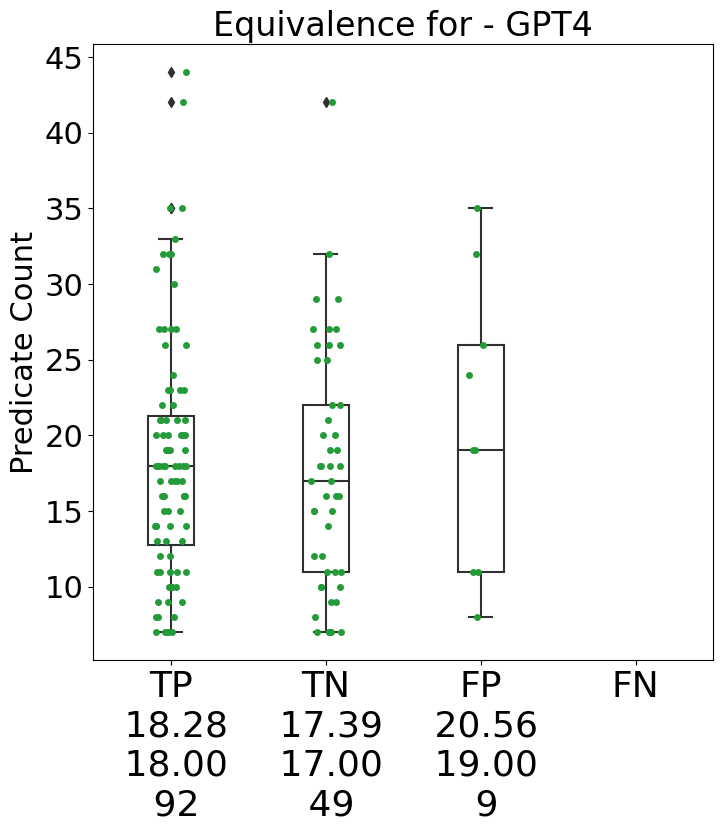

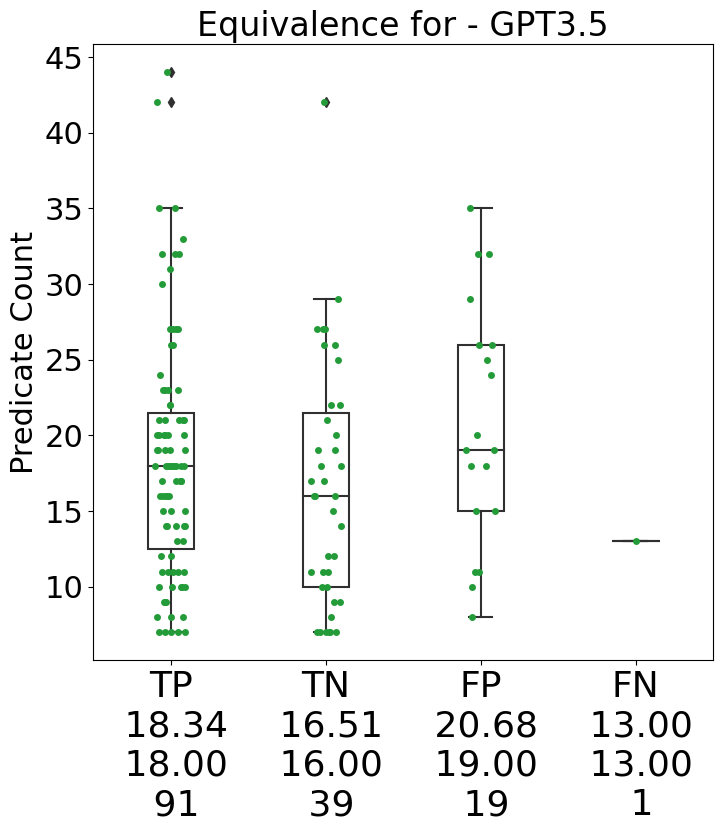

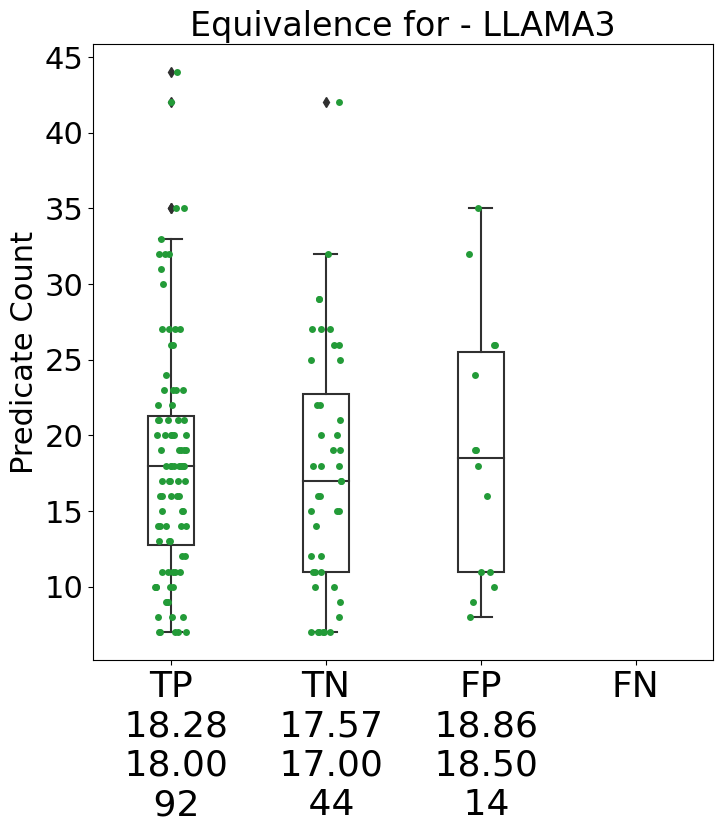

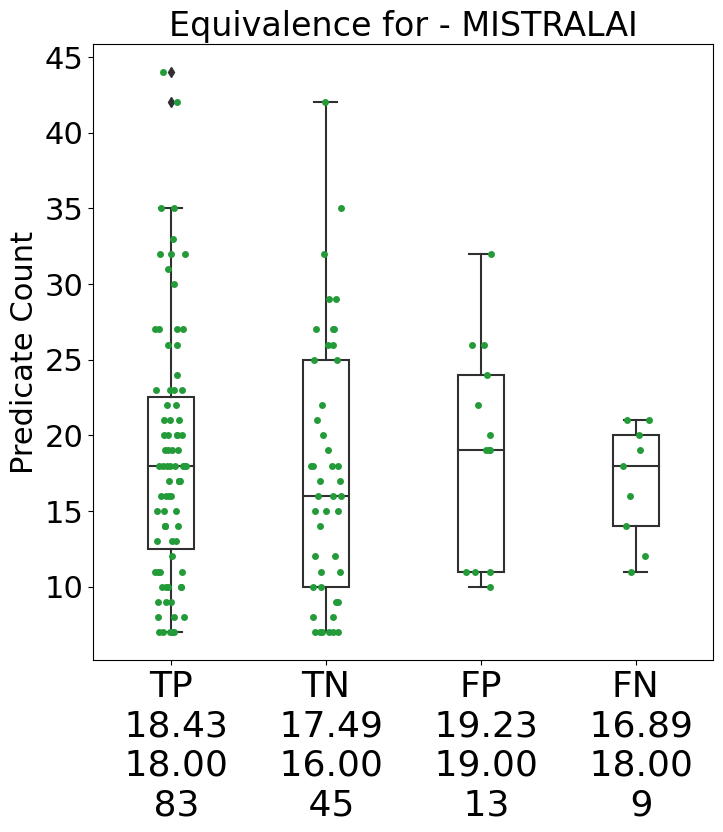

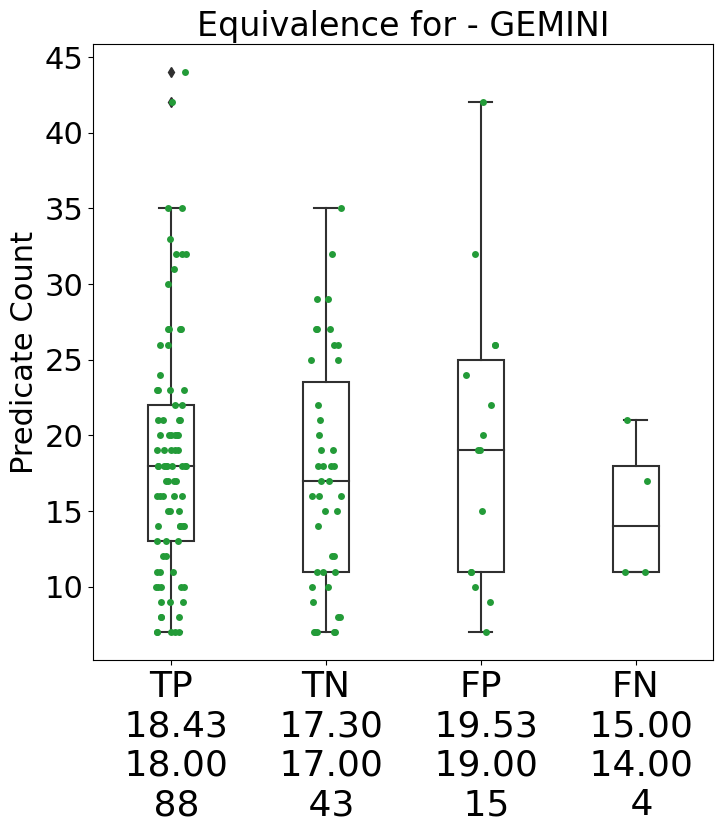

In [38]:
#equi with join for predicate count as it has no value for FN in gpt4 and mistralai
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Disable warnings
warnings.filterwarnings("ignore")

# Define the directory for saving plots
output_directory = r'C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Load data
stats = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Stats\join_stats.csv")
missing_word = pd.read_csv(r"C:\Users\anany\OneDrive\Desktop\MS_Thesis\Results of LLM\Experiments for Equivalence\equi_join.csv")

# Data merging
merged_df = pd.merge(stats, missing_word, on='SQL_Statement', how='inner')

# Convert 'YES'/'NO' to 1/0
merged_df['Original'] = merged_df['Original'].map({'YES': 1, 'NO': 0})
for llm in ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']:
    merged_df[llm] = merged_df[llm].map({'YES': 1, 'NO': 0}).fillna(1)

# Define the list of models
llms = ['gpt4', 'gpt3.5', 'llama3', 'mistralai', 'gemini']

# Plotting loop
for llm in llms:
    fig, ax = plt.subplots(figsize=(8, 8))

    y_true = merged_df['Original']
    y_pred = merged_df[llm]

    # Calculate TP, TN, FP, FN
    merged_df[f'{llm}_tp'] = (y_true == 1) & (y_pred == 1)
    merged_df[f'{llm}_tn'] = (y_true == 0) & (y_pred == 0)
    merged_df[f'{llm}_fp'] = (y_true == 0) & (y_pred == 1)
    merged_df[f'{llm}_fn'] = (y_true == 1) & (y_pred == 0)

    # Initialize data structure for categories
    plot_data = pd.DataFrame()
    categories = ['TP', 'TN', 'FP', 'FN']
    custom_labels = []

    # Loop through each category to collect data and labels
    for cat in categories:
        cat_name = f"{llm}_{cat.lower()}"
        true_indices = merged_df[cat_name]
        avg = merged_df.loc[true_indices, 'Predicate_Count'].mean() if true_indices.any() else 0
        med = merged_df.loc[true_indices, 'Predicate_Count'].median()
        count = true_indices.sum()
        label_part = cat.split('_')[-1].upper()
        label = f"{label_part}\n {avg:.2f}\n {med:.2f}\n {count}" if count > 0 else cat
        # Append data to plot_data
        merged_df.loc[true_indices, 'category'] = cat
        plot_data = pd.concat([plot_data, merged_df[true_indices]])

        # Append label
        custom_labels.append(label)

    # Ensure all categories are represented, even if empty
    plot_data['category'] = pd.Categorical(plot_data['category'], categories=categories, ordered=True)

    # Plot boxplot and stripplot
    sns.boxplot(x='category', y='Predicate_Count', data=plot_data, order=categories, palette=sns.color_palette("colorblind"), width=0.3, ax=ax, boxprops=dict(facecolor='none'))
    sns.stripplot(x='category', y='Predicate_Count', data=plot_data, order=categories, color=(35/255, 155/255, 56/255), size=5, jitter=True, ax=ax)

    # Set x-ticks and labels
    ax.set_xticks(range(len(custom_labels)))
    ax.set_xticklabels(custom_labels, rotation=0, ha='center',fontsize=26)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)  # Set y-axis labels font size
    ax.set_ylabel('Predicate Count', fontsize=22)
    ax.set_xlabel('')
    ax.set_title(f"Equivalence for - {llm.upper()}", fontsize=24)

    # Show the plot with title
    
    # Save plots as PDF
    pdf_filename = os.path.join(output_directory, f"{llm}_Predicate_count_plot_equi_join.pdf")
    plt.savefig(pdf_filename, bbox_inches='tight')
    plt.show()
    plt.close(fig)
